#ĐỒ ÁN MÔN IE224 - Phân tích dữ liệu
##GVHD: Phạm Thế Sơn
##DANH SÁCH THÀNH VIÊN:


1.   21522219 - Đỗ Nguyễn Anh Khoa
2.   21522194 - Nguyễn Phúc Khang
3.   21521140 - Nguyễn Tuệ Minh




#Mục Lục


1.   Đọc dữ liệu
2.   Làm sạch bộ dữ liệu
    * 2.1   Xóa những cột có quá nhiều dữ liệu thiếu và không cần thiết
    * 2.2   Thuộc tính địa điểm
    * 2.3   Thuộc tính tình trạng bất động sản
    * 2.4   Diện tích
    * 2.5   GIÁ và USD
    * 2.6   Thêm cột giá tiền trên m2
3.   Xử lý các giá trị bị Null
    * 3.1   Tình trạng nội thất
    * 3.2   Giay To
4.   Phân tích các biến
5.   Xây dựng mô hình
    * 5.1   Neural Network
    * 5.2   Linear Regression
    * 5.3   Gradient Boosting Machine







#1. Đọc dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# URL của tệp CSV
url = '/content/drive/MyDrive/IE224/dataset.csv'  # Thay đổi URL tại đây

# Đọc tệp CSV từ URL
df = pd.read_csv(url)
df.head(50)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.00,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.00,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.00,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09,107500.0,11.585246
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.00,1.0,A,7.0,1.0,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4.000000e+09,166667.0,12.023753
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.00,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,2.950000e+09,122917.0,11.719265
5,"196, 196 Đường Cao Lỗ, Phường 4, Quận 8, Tp Hồ...",Quận 8,Đã bàn giao,71.00,2.0,NaN,NaN,1.0,Chung cư,Đang chờ sổ,NaN,NaN,NaN,NaN,NaN,1.980000e+09,82500.0,11.320554
6,"79-81, 79-81 Đường Nguyễn Xí, Phường 26, Quận ...",Quận Bình Thạnh,Đã bàn giao,71.00,2.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,NaN,NaN,NaN,NaN,2.720000e+09,113333.0,11.638086
7,"Đường Nguyễn Văn Linh, Xã Bình Hưng, Huyện Bìn...",Huyện Bình Chánh,Đã bàn giao,78.00,2.0,mp4-5,9.0,2.0,Chung cư,Đang chờ sổ,NaN,NaN,NaN,NaN,NaN,2.590000e+09,107917.0,11.589118
8,"Đường Hồ Học Lãm, Phường An Lạc, Quận Bình Tân...",Quận Bình Tân,Đã bàn giao,50.00,1.0,A2,3.0,1.0,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Nam,Bắc,NaN,1.390000e+09,57917.0,10.966766
9,"Đường Nguyễn Văn Bứa, Xã Xuân Thới Sơn, Huyện ...",Huyện Hóc Môn,Đã bàn giao,40.00,1.0,NaN,NaN,1.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,1.500000e+08,6250.0,8.740337


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  object 
 2   TinhTrangBDS      24017 non-null  object 
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        6865 non-null   object 
 6   SoTang            6529 non-null   float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  object 
 9   GiayTo            18286 non-null  object 
 10  MaCanHo           3281 non-null   object 
 11  TinhTrangNoiThat  12420 non-null  object 
 12  HuongCuaChinh     9167 non-null   object 
 13  HuongBanCong      8502 non-null   object 
 14  DacDiem           5431 non-null   object 
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  object 
 2   TinhTrangBDS      24017 non-null  object 
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        6865 non-null   object 
 6   SoTang            6529 non-null   float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  object 
 9   GiayTo            18286 non-null  object 
 10  MaCanHo           3281 non-null   object 
 11  TinhTrangNoiThat  12420 non-null  object 
 12  HuongCuaChinh     9167 non-null   object 
 13  HuongBanCong      8502 non-null   object 
 14  DacDiem           5431 non-null   object 
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [ ]:
# Số lượng giá trị null
null_counts = df.isnull().sum()

# Tính phần trăm giá trị null cho từng feature
null_percentage = (null_counts / len(df)) * 100

# Kết hợp lại thành một DataFrame để dễ xem
null_stats = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentage
})

# Hiển thị thống kê
null_stats


,Null Count,Null Percentage (%)
DiaChi,0,0.000000
Quan,0,0.000000
TinhTrangBDS,2,0.008327
DienTich,0,0.000000
Phongngu,0,0.000000
TenPhanKhu,17154,71.418460
SoTang,17490,72.817353
PhongTam,0,0.000000
Loai,0,0.000000
GiayTo,5733,23.868604


In [ ]:
# thống kê từng thành phần trong từng thuộc tính có trong bảng
def Value_union(df, name_column):
  return df[name_column].value_counts()

# Tạo một danh sách các tên cột cần tính toán.
name_columns = list(df.columns)

# Tính toán giá trị không lặp lại của từng cột và lưu vào một biến.
value_unions = {}
for name_column in name_columns:
  value_unions[name_column] = Value_union(df, name_column)

# In giá trị không lặp lại của từng cột.
for name_column, value_union in value_unions.items():
  print(f"Giá trị không lặp lại của cột {name_column}:\n{value_union}")
  print("\n------------------------------------------------------------------------------------------")



Giá trị không lặp lại của cột DiaChi:
DiaChi
Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận 9, Tp Hồ Chí Minh                          867
Đường Nguyễn Hữu Thọ, Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh                        543
số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân Phú, Tp Hồ Chí Minh                       437
Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hưng Hoà B, Quận Bình Tân, Tp Hồ Chí Minh    389
Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp Hồ Chí Minh                                377
                                                                                        ... 
chung cư Hausneo, Liên Phường, Phường Phú Hữu, Quận 9, Tp Hồ Chí Minh                      1
Đường Nguyễn Thị Định, Phường Thạnh Mỹ Lợi, Quận 2, Tp Hồ Chí Minh                         1
4.18, Đường Độc Lập, Phường Tân Quý, Quận Tân Phú, Tp Hồ Chí Minh                          1
Hồ biểu chánh, Phường 11, Quận Phú Nhuận, Tp Hồ Chí Minh                                   1
154, Nguyễn Tất Thành, Ph

#2. Làm sạch bộ dữ liệu

##Xóa những cột có quá nhiều dữ liệu thiếu và không cần thiết

In [ ]:
# Hàm để xóa các cột không cần thiết từ dataframe
#TenPhanKhu xóa vì tùy mỗi chung cư sẽ phân theo phân khu khác nhau không liên quan và null tới 17154 ~ 71%
#SoTang null quá nhiều 17490 ~ 71%
#MaCanHo không liên quan tới việc phân tích giá và null 207388 ~ 83
#Dacdiem chỉ có 1 giá trị và null tới 18588 ~ 75
def remove_features(df):
    # Các cột cần xóa
    features_to_remove = ['TenPhanKhu', 'MaCanHo', 'DacDiem','SoTang','HuongCuaChinh','HuongBanCong']

    # Xóa các cột
    df = df.drop(columns=features_to_remove, errors='ignore')

    # Trả lại dataframe đã xử lý
    return df

# Giả sử df là dataframe bạn đã có
df_cleaned = remove_features(df)
df_cleaned


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,2.0,Chung cư,Đã có sổ,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2.0,Chung cư,Giấy tờ khác,NaN,2.580000e+09,107500.0,11.585246
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,4.000000e+09,166667.0,12.023753
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp,2.950000e+09,122917.0,11.719265
...,...,...,...,...,...,...,...,...,...,...,...,...
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2.100000e+09,87500.0,11.379394
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp,1.550000e+09,64583.0,11.075706
24016,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Quận 8,Đã bàn giao,115.0,2.0,2.0,Chung cư,Đã có sổ,NaN,3.300000e+09,137500.0,11.831379
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ,2.650000e+09,110417.0,11.612019


In [ ]:
# Vì lấy nguồn từ nhà tốt nên không thể tránh khỏi việc có nhưng bài đăng được đăng đi đăng lại nhiều lần để câu view thì ta nên loại bỏ
df_cleaned = df_cleaned.drop_duplicates()

##Thuộc tính địa điêm

In [ ]:
#Trong từng quận nhỏ sẽ có các phường, các huyện tách ra thành 1 đặc trưng riêng

# Hàm trích xuất phường/xã từ địa chỉ
def extract_ward(diachi):
    match = re.search(r'(Phường|Xã)\s+([\w\s]+),', diachi)
    if match:
        return match.group(2).strip()  # Lấy tên phường/xã
    return None

# Tách phường/xã và thêm vào cột mới
df_cleaned['Phuong_Xa'] = df_cleaned['DiaChi'].apply(extract_ward)

# Hiển thị DataFrame đã thêm cột mới
df_cleaned

<ipython-input-10-8696bd841af9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phuong_Xa'] = df_cleaned['DiaChi'].apply(extract_ward)


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Phuong_Xa
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,2.0,Chung cư,Đã có sổ,NaN,2.000000e+09,83333.0,11.330600,Phú Thuận
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,5.300000e+09,220833.0,12.305162,Tân Thuận Tây
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2.0,Chung cư,Giấy tờ khác,NaN,2.580000e+09,107500.0,11.585246,An Lạc
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Quận Tân Bình,Đã bàn giao,70.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,4.000000e+09,166667.0,12.023753,2
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Quận 6,Đã bàn giao,83.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất cao cấp,2.950000e+09,122917.0,11.719265,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24012,"334, 334 Đường Tô Hiến Thành, Phường 14, Quận ...",Quận 10,Đã bàn giao,48.0,1.0,1.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,3.799000e+09,158292.0,11.972197,14
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.0,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2.100000e+09,87500.0,11.379394,Hiệp Phú
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.0,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp,1.550000e+09,64583.0,11.075706,Bình Hưng
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.0,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ,2.650000e+09,110417.0,11.612019,13


In [ ]:
0#Sau khi tách thành công ta thấy số lượng còn lại phường xã là 139 sample null số lượng này không đáng kể nên ta sẽ xóa nhưng cột null
df_cleaned['Phuong_Xa'].isnull().sum()


124

In [ ]:
df_cleaned = df_cleaned.dropna(subset=['Phuong_Xa'])

In [ ]:
for value in df_cleaned['Quan'].unique():
    print(value)


 Quận 7
 Quận Bình Tân
 Quận Tân Bình
 Quận 6
 Quận 8
 Quận Bình Thạnh
 Huyện Bình Chánh
 Huyện Hóc Môn
 Quận Thủ Đức
 Quận 9
 Quận 10
 Huyện Nhà Bè
 Quận 12
 Quận Tân Phú
 Quận 2
 Quận Phú Nhuận
 Quận 1
 Quận 4
 Quận 11
 Quận 5
 Quận Gò Vấp
 Quận 3
 Huyện Củ Chi


In [ ]:
# Loại bỏ khoảng trắng ở đầu và cuối, và chuyển thành chữ thường
df_cleaned['Quan'] = df_cleaned['Quan'].str.strip().str.lower()

# Kiểm tra các giá trị duy nhất sau khi đã xử lý
print(df_cleaned['Quan'].unique())

['quận 7' 'quận bình tân' 'quận tân bình' 'quận 6' 'quận 8'
 'quận bình thạnh' 'huyện bình chánh' 'huyện hóc môn' 'quận thủ đức'
 'quận 9' 'quận 10' 'huyện nhà bè' 'quận 12' 'quận tân phú' 'quận 2'
 'quận phú nhuận' 'quận 1' 'quận 4' 'quận 11' 'quận 5' 'quận gò vấp'
 'quận 3' 'huyện củ chi']


<ipython-input-14-d70937c86372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Quan'] = df_cleaned['Quan'].str.strip().str.lower()


In [ ]:
for value in df_cleaned['TinhTrangBDS'].unique():
    print(value)


Đã bàn giao
Chưa bàn giao
nan


In [ ]:
# Loại bỏ khoảng trắng ở đầu và cuối, và chuyển thành chữ thường
df_cleaned['TinhTrangBDS'] = df_cleaned['TinhTrangBDS'].str.strip().str.lower()

# Kiểm tra các giá trị duy nhất sau khi đã xử lý
print(df_cleaned['TinhTrangBDS'].unique())

<ipython-input-16-ad14cb332b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TinhTrangBDS'] = df_cleaned['TinhTrangBDS'].str.strip().str.lower()


['đã bàn giao' 'chưa bàn giao' nan]


In [ ]:
# Loại bỏ khoảng trắng ở đầu và cuối, và chuyển thành chữ thường
df_cleaned['Loai'] = df_cleaned['Loai'].str.strip().str.lower()

# Kiểm tra các giá trị duy nhất sau khi đã xử lý
print(df_cleaned['Loai'].unique())

['chung cư' 'căn hộ dịch vụ, mini' 'officetel' 'penthouse' 'duplex'
 'tập thể, cư xá']


<ipython-input-17-e10ada226776>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Loai'] = df_cleaned['Loai'].str.strip().str.lower()


In [ ]:
for value in df_cleaned['TinhTrangNoiThat'].unique():
    print(value)

nan
Nội thất cao cấp
Hoàn thiện cơ bản
Bàn giao thô
Nội thất đầy đủ


In [ ]:
df_cleaned['TinhTrangNoiThat'].replace('nan', np.nan, inplace=True)

<ipython-input-19-da4f9551b188>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['TinhTrangNoiThat'].replace('nan', np.nan, inplace=True)
<ipython-input-19-da4f9551b188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TinhTrangNoiThat'].replace('nan', np.nan, inplace=True)


In [ ]:
df_cleaned['Phuong_Xa'].unique()

array(['Phú Thuận', 'Tân Thuận Tây', 'An Lạc', '2', '11', '4', '26',
       'Bình Hưng', 'Xuân Thới Sơn', 'Tân Tạo A', 'Tam Bình',
       'Long Thạnh Mỹ', 'Trường Thạnh', 'Phú Hữu', '12', 'Quận 9', '22',
       'Phước Kiển', 'Trung Mỹ Tây', '13', '14', 'Phong Phú',
       'Bình Hưng Hoà B', 'Xuân Thới Thượng', '6', 'Nhơn Đức',
       'Hòa Thạnh', 'An Phú', 'Trường Thọ', 'Phước Long B', 'Tân Kiểng',
       'Tân Thới Nhất', 'Tân Phú', '9', '27', '8', 'Phú Mỹ', 'Tân Tạo',
       'An Lợi Đông', 'Tân Thới Hòa', 'Phú Xuân', '16', 'Linh Tây',
       'Hiệp Bình Chánh', 'An Lạc A', 'Linh Trung', 'Sơn Kỳ', 'Tân Phong',
       'Nguyễn Cư Trinh', 'Tam Phú', '5', 'Tân Hưng', 'Bình Trị Đông',
       'Bến Nghé', '1', 'Hiệp Bình Phước', '15', 'Tân Chánh Hiệp',
       'Bình Thọ', 'Thạnh Lộc', 'Tân Quý', 'Tân Hưng Thuận',
       'Bình Trưng Tây', '3', 'Linh Xuân', 'Thủ Thiêm', 'Hiệp Phú', '25',
       '7', 'Cát Lái', 'An Phú Đông', 'Thảo Điền', 'Tân Thành',
       'Phú Trung', 'Hiệp Tân', 'Tây Thạnh', '

In [ ]:
#ta thấy ràng có rất nhiều giá trị chổ thì viết hoa, chổ thì viết thường vì thế ta chuyển chúng về dạng viết thường hết
# Chuyển đổi tất cả các giá trị trong cột 'Phuong_Xa' về chữ thường
df_cleaned['Phuong_Xa'] = df_cleaned['Phuong_Xa'].str.lower()
df_cleaned['Phuong_Xa'].unique()

<ipython-input-21-09d7a8f1b50b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phuong_Xa'] = df_cleaned['Phuong_Xa'].str.lower()


array(['phú thuận', 'tân thuận tây', 'an lạc', '2', '11', '4', '26',
       'bình hưng', 'xuân thới sơn', 'tân tạo a', 'tam bình',
       'long thạnh mỹ', 'trường thạnh', 'phú hữu', '12', 'quận 9', '22',
       'phước kiển', 'trung mỹ tây', '13', '14', 'phong phú',
       'bình hưng hoà b', 'xuân thới thượng', '6', 'nhơn đức',
       'hòa thạnh', 'an phú', 'trường thọ', 'phước long b', 'tân kiểng',
       'tân thới nhất', 'tân phú', '9', '27', '8', 'phú mỹ', 'tân tạo',
       'an lợi đông', 'tân thới hòa', 'phú xuân', '16', 'linh tây',
       'hiệp bình chánh', 'an lạc a', 'linh trung', 'sơn kỳ', 'tân phong',
       'nguyễn cư trinh', 'tam phú', '5', 'tân hưng', 'bình trị đông',
       'bến nghé', '1', 'hiệp bình phước', '15', 'tân chánh hiệp',
       'bình thọ', 'thạnh lộc', 'tân quý', 'tân hưng thuận',
       'bình trưng tây', '3', 'linh xuân', 'thủ thiêm', 'hiệp phú', '25',
       '7', 'cát lái', 'an phú đông', 'thảo điền', 'tân thành',
       'phú trung', 'hiệp tân', 'tây thạnh', '

In [ ]:
df_cleaned.shape[0]

17537

##Thuộc tính tình trạng bất động sản

In [ ]:
#Vì số lượng tình trạng bất động sản null rất ít nên ta sẽ xóa nhứng sample có giá trị null
df_cleaned['TinhTrangBDS'].isnull().sum()


2

In [ ]:
df_cleaned = df_cleaned.dropna(subset=['TinhTrangBDS'])

##Diện tích

In [ ]:
df_cleaned['DienTich'].describe()

,DienTich
count,17535.000000
mean,71.011338
std,31.433983
min,1.000000
25%,55.000000
50%,67.800000
75%,80.000000
max,500.000000


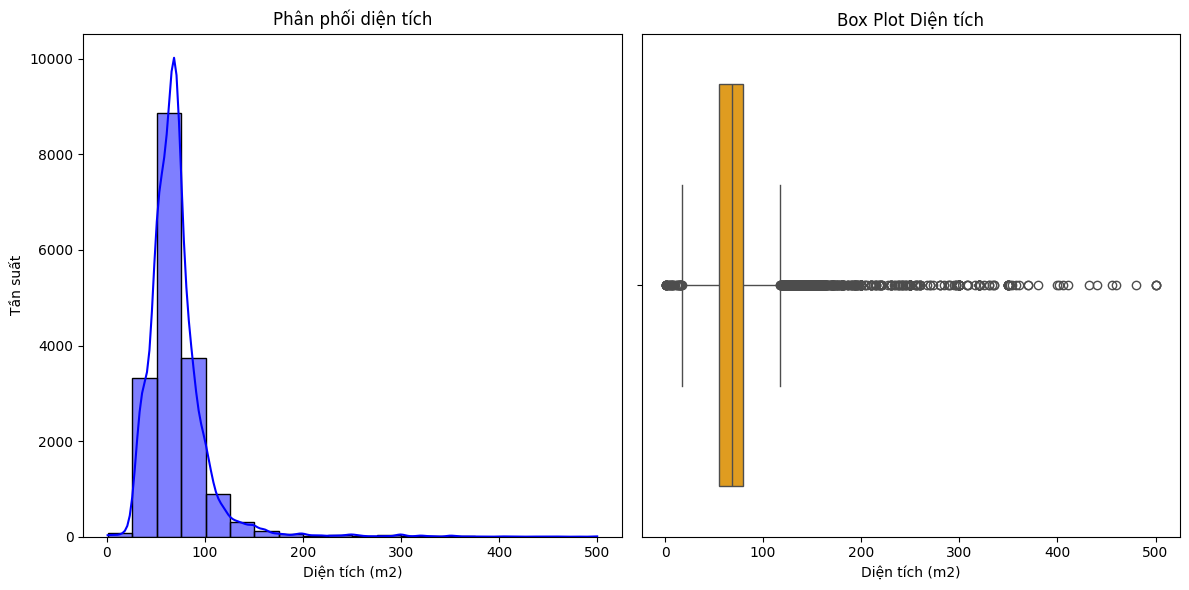

In [ ]:
# Thiết lập kích thước hình ảnh
plt.figure(figsize=(12, 6))

# Histogram - Biểu đồ phân phối
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['DienTich'], bins=20, kde=True, color='blue')
plt.title('Phân phối diện tích')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Tần suất')

# Box plot - Biểu đồ hộp
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['DienTich'], color='orange')
plt.title('Box Plot Diện tích')
plt.xlabel('Diện tích (m2)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
#đếm các giá trị null của từng feature của bảng
df_cleaned.isnull().sum()

,0
DiaChi,0
Quan,0
TinhTrangBDS,0
DienTich,0
Phongngu,0
PhongTam,0
Loai,0
GiayTo,4591
TinhTrangNoiThat,8806
Gia,0


##GIÁ và USD


In [ ]:
#do tiền việt nam khá nên nên rút ngắn lại bớt 6 số 0
df_cleaned['Gia'] = df_cleaned['Gia'] / 1000000

In [ ]:
df_cleaned

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Phuong_Xa
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,NaN,2000.0,83333.0,11.330600,phú thuận
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,220833.0,12.305162,tân thuận tây
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,NaN,2580.0,107500.0,11.585246,an lạc
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,166667.0,12.023753,2
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,122917.0,11.719265,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24012,"334, 334 Đường Tô Hiến Thành, Phường 14, Quận ...",quận 10,đã bàn giao,48.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,3799.0,158292.0,11.972197,14
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",quận 9,đã bàn giao,53.0,2.0,1.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2100.0,87500.0,11.379394,hiệp phú
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",huyện bình chánh,đã bàn giao,76.0,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,1550.0,64583.0,11.075706,bình hưng
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",quận bình thạnh,đã bàn giao,82.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2650.0,110417.0,11.612019,13


In [ ]:
df_cleaned['Gia_USD'] = df_cleaned['Gia'] / df_cleaned['USD']
df_cleaned

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Phuong_Xa,Gia_USD
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,NaN,2000.0,83333.0,11.330600,phú thuận,0.024
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,220833.0,12.305162,tân thuận tây,0.024
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,NaN,2580.0,107500.0,11.585246,an lạc,0.024
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,166667.0,12.023753,2,0.024
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,122917.0,11.719265,11,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24012,"334, 334 Đường Tô Hiến Thành, Phường 14, Quận ...",quận 10,đã bàn giao,48.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,3799.0,158292.0,11.972197,14,0.024
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",quận 9,đã bàn giao,53.0,2.0,1.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2100.0,87500.0,11.379394,hiệp phú,0.024
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",huyện bình chánh,đã bàn giao,76.0,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,1550.0,64583.0,11.075706,bình hưng,0.024
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",quận bình thạnh,đã bàn giao,82.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2650.0,110417.0,11.612019,13,0.024


In [ ]:
#VÌ TỶ GIÁ GIỮA CÁC SAMPLE KHÔNG TRÊN QUÁ NHIỀU NÊN TA CÓ THỂ XÓA ĐI CỘT USD
def remove_columns(df, columns):
  return df.drop(columns=columns)

df_cleaned = remove_columns(df_cleaned, ['USD', 'Gia_USD'])

In [ ]:
df_cleaned

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,NaN,2000.0,11.330600,phú thuận
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,12.305162,tân thuận tây
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,NaN,2580.0,11.585246,an lạc
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,12.023753,2
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,11.719265,11
...,...,...,...,...,...,...,...,...,...,...,...,...
24012,"334, 334 Đường Tô Hiến Thành, Phường 14, Quận ...",quận 10,đã bàn giao,48.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,3799.0,11.972197,14
24014,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",quận 9,đã bàn giao,53.0,2.0,1.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2100.0,11.379394,hiệp phú
24015,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",huyện bình chánh,đã bàn giao,76.0,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,1550.0,11.075706,bình hưng
24017,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",quận bình thạnh,đã bàn giao,82.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2650.0,11.612019,13


Thống kê mô tả về giá nhà:
count     17535.000000
mean       2810.403859
std        9035.692160
min           1.000000
25%        1600.000000
50%        2227.000000
75%        3200.000000
max      980000.000000
Name: Gia, dtype: float64
Số lượng giá trị null trong cột 'Gia': 0


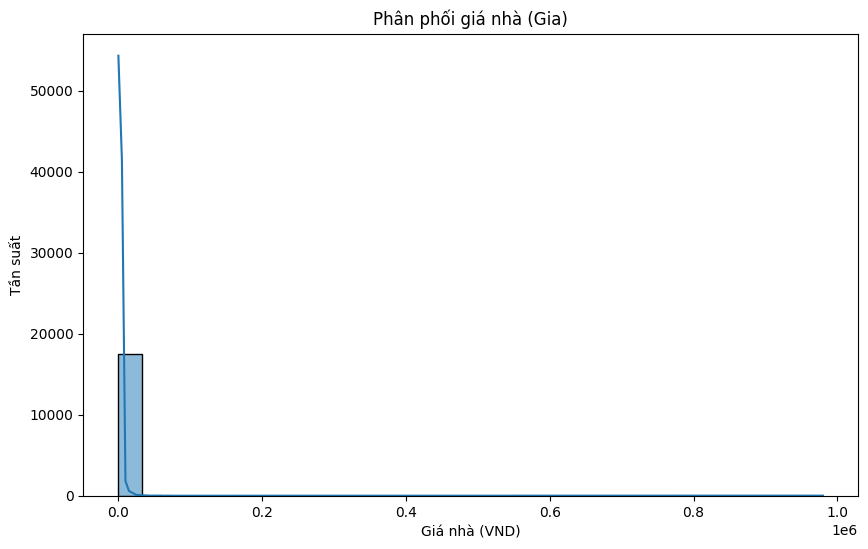

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_property_price(df, price_column):
    """
    Phân tích các thuộc tính giá nhà.

    Args:
    df (pd.DataFrame): DataFrame chứa dữ liệu bất động sản.
    price_column (str): Tên cột chứa thông tin giá nhà.

    Returns:
    None: Hiển thị kết quả phân tích.
    """
    # Kiểm tra xem cột giá có tồn tại trong DataFrame không
    if price_column not in df.columns:
        print(f"Cột '{price_column}' không tồn tại trong DataFrame.")
        return

    # Thống kê mô tả
    description = df[price_column].describe()
    print("Thống kê mô tả về giá nhà:")
    print(description)

    # Kiểm tra số lượng giá trị null
    null_count = df[price_column].isnull().sum()
    print(f"Số lượng giá trị null trong cột '{price_column}': {null_count}")

    # Vẽ histogram để hiển thị phân phối giá
    plt.figure(figsize=(10, 6))
    sns.histplot(df[price_column].dropna(), bins=30, kde=True)
    plt.title(f'Phân phối giá nhà ({price_column})')
    plt.xlabel('Giá nhà (VND)')
    plt.ylabel('Tần suất')
    plt.show()

# Sử dụng hàm để phân tích cột 'Gia'
analyze_property_price(df_cleaned, 'Gia')


##Thêm cột giá tiền trên m2

In [ ]:
def add_price_per_square_meter(df, price_column, area_column):
    """
    Thêm cột tính giá nhà trên mỗi mét vuông (m²).

    Args:
    df (pd.DataFrame): DataFrame chứa dữ liệu bất động sản.
    price_column (str): Tên cột chứa thông tin giá nhà.
    area_column (str): Tên cột chứa thông tin diện tích.

    Returns:
    pd.DataFrame: DataFrame đã thêm cột giá trên mỗi m².
    """
    # Kiểm tra xem các cột giá và diện tích có tồn tại trong DataFrame không
    if price_column not in df.columns or area_column not in df.columns:
        print(f"Cột '{price_column}' hoặc '{area_column}' không tồn tại trong DataFrame.")
        return df

    # Thêm cột tính giá trên mỗi m² (loại bỏ các hàng có giá hoặc diện tích là null)
    df['Gia_m2'] = df.apply(lambda row: row[price_column] / row[area_column] if pd.notnull(row[price_column]) and pd.notnull(row[area_column]) and row[area_column] > 0 else None, axis=1)

    return df

# Sử dụng hàm để thêm cột giá trên m²
df_cleaned = add_price_per_square_meter(df_cleaned, 'Gia', 'DienTich')

# Hiển thị kết quả
df_cleaned.head()


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,NaN,2000.0,11.330600,phú thuận,32.258065
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,12.305162,tân thuận tây,55.789474
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,NaN,2580.0,11.585246,an lạc,34.400000
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,12.023753,2,57.142857
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,11.719265,11,35.542169


In [ ]:
df_cleaned.isnull().sum()

,0
DiaChi,0
Quan,0
TinhTrangBDS,0
DienTich,0
Phongngu,0
PhongTam,0
Loai,0
GiayTo,4591
TinhTrangNoiThat,8806
Gia,0


In [ ]:
df_cleaned.shape[0]

17535

#3. Xử lý các giá trị bị null

##Tình trạng nội thất

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Giả sử df_selected đã được định nghĩa và chứa dữ liệu
# Chọn các thuộc tính không null để dự đoán
features_tinhtrang = ['Quan', 'TinhTrangBDS', 'DienTich', 'Phongngu', 'PhongTam', 'Loai', 'Gia', 'log_price', 'Phuong_Xa', 'Gia_m2', 'TinhTrangNoiThat']
df_selected = df_cleaned[features_tinhtrang]

# Bước 1: Lọc các hàng có giá trị không null trong cột TinhTrangNoiThat
df_train = df_selected[df_selected['TinhTrangNoiThat'].notnull()]  # Lọc ra dữ liệu huấn luyện

# Tách dữ liệu huấn luyện và kiểm tra với 10% để test
X = df_train.drop(columns=['TinhTrangNoiThat'])  # Chọn tất cả các cột trừ cột mục tiêu
y = df_train['TinhTrangNoiThat']  # Cột mục tiêu

# Sử dụng LabelEncoder để mã hóa các cột object
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Mã hóa cột mục tiêu
le_noithat = LabelEncoder()
y = le_noithat.fit_transform(y.astype(str))

# Bước 2: Huấn luyện mô hình Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Bước 3: Dự đoán trên tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
y_pred = model.predict(X_test)

# Bước 4: Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)

# In ra độ chính xác
print(f"Độ chính xác của mô hình: {accuracy:.2f}")

# Bước 5: Tiếp tục sử dụng mô hình đã huấn luyện để dự đoán cho các giá trị null
df_null = df_selected[df_selected['TinhTrangNoiThat'].isnull()].copy()  # Lấy df_null từ df_selected

# Mã hóa df_null
for column in df_null.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        # Thay thế các giá trị chưa thấy bằng giá trị ngẫu nhiên hợp lệ
        df_null[column] = df_null[column].fillna(np.random.choice(label_encoders[column].classes_))

        # Kiểm tra các giá trị chưa thấy
        unseen_values = df_null[column][~df_null[column].isin(label_encoders[column].classes_)]
        if not unseen_values.empty:
            # Lấy các giá trị hợp lệ
            valid_values = label_encoders[column].classes_
            # Chọn một giá trị ngẫu nhiên từ các giá trị hợp lệ
            random_value = np.random.choice(valid_values)
            # Sử dụng mask để thay thế các giá trị chưa thấy
            df_null[column] = df_null[column].mask(df_null[column].isin(unseen_values), random_value)

        # Mã hóa dữ liệu
        df_null[column] = label_encoders[column].transform(df_null[column].astype(str))

# Dự đoán các giá trị null của cột TinhTrangNoiThat
df_null['TinhTrangNoiThat'] = model.predict(df_null.drop(columns=['TinhTrangNoiThat']))

# Chuyển ngược lại giá trị mã hóa thành giá trị gốc
df_null['TinhTrangNoiThat'] = le_noithat.inverse_transform(df_null['TinhTrangNoiThat'])

# Bước 6: Lọc các hàng không xác định được
df_null = df_null[df_null['TinhTrangNoiThat'].notnull()]

# Điền các giá trị đã dự đoán vào DataFrame gốc
df_cleaned.loc[df_cleaned['TinhTrangNoiThat'].isnull(), 'TinhTrangNoiThat'] = df_null['TinhTrangNoiThat']

# Kết quả cuối cùng
df_cleaned = df_cleaned[df_cleaned['TinhTrangNoiThat'].notnull()]  # Loại bỏ các hàng không xác định được
df_cleaned.head()


Độ chính xác của mô hình: 0.96


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2000.0,11.330600,phú thuận,32.258065
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,12.305162,tân thuận tây,55.789474
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,Hoàn thiện cơ bản,2580.0,11.585246,an lạc,34.400000
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,12.023753,2,57.142857
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,11.719265,11,35.542169


In [ ]:
df_cleaned['TinhTrangNoiThat'].unique()

array(['Nội thất đầy đủ', 'Nội thất cao cấp', 'Hoàn thiện cơ bản',
       'Bàn giao thô'], dtype=object)

In [ ]:
df_cleaned.isnull().sum()

,0
DiaChi,0
Quan,0
TinhTrangBDS,0
DienTich,0
Phongngu,0
PhongTam,0
Loai,0
GiayTo,4591
TinhTrangNoiThat,0
Gia,0


In [ ]:
df.shape[0]

24019

In [ ]:
df_cleaned.shape[0]

17535

In [ ]:
df_cleaned['Loai'].unique()

array(['chung cư', 'căn hộ dịch vụ, mini', 'officetel', 'penthouse',
       'duplex', 'tập thể, cư xá'], dtype=object)

##Giay To





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Giả sử df_cleaned đã được định nghĩa và chứa dữ liệu
# Chọn các thuộc tính không null để dự đoán
features_tinhtrang = ['Quan', 'TinhTrangBDS', 'DienTich', 'Phongngu', 'PhongTam', 'Loai', 'Gia', 'log_price', 'Phuong_Xa', 'Gia_m2', 'GiayTo']

# Đặt lại chỉ số cho df_cleaned để loại bỏ các chỉ số trùng lặp
df_cleaned = df_cleaned.reset_index(drop=True)
df_selected = df_cleaned[features_tinhtrang]

# Bước 1: Lọc các hàng có giá trị không null trong cột GiayTo
df_train = df_selected[df_selected['GiayTo'].notnull()]  # Dữ liệu huấn luyện
df_null = df_selected[df_selected['GiayTo'].isnull()].copy()  # Dữ liệu để dự đoán

# Tách dữ liệu huấn luyện và kiểm tra với 10% để test
X = df_train.drop(columns=['GiayTo'])  # Chọn tất cả các cột trừ cột mục tiêu
y = df_train['GiayTo']  # Cột mục tiêu

# Sử dụng LabelEncoder để mã hóa các cột object
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Mã hóa cột mục tiêu
le_giayto = LabelEncoder()
y = le_giayto.fit_transform(y.astype(str))

# Chia tập dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# Bước 2: Huấn luyện mô hình Random Forest
model = RandomForestClassifier(random_state=3)
model.fit(X_train, y_train)

# Bước 3: Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")

# Mã hóa dữ liệu null để dự đoán
for column in df_null.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        # Thay thế các giá trị chưa thấy bằng giá trị ngẫu nhiên hợp lệ
        unseen_values = df_null[column][~df_null[column].isin(label_encoders[column].classes_)]
        if not unseen_values.empty:
            random_value = np.random.choice(label_encoders[column].classes_)
            df_null[column] = df_null[column].mask(df_null[column].isin(unseen_values), random_value)

        # Mã hóa dữ liệu
        df_null[column] = label_encoders[column].transform(df_null[column].astype(str))

# Dự đoán các giá trị null của cột GiayTo
df_null['GiayTo'] = model.predict(df_null.drop(columns=['GiayTo']))

# Chuyển ngược lại giá trị mã hóa thành giá trị gốc
df_null['GiayTo'] = le_giayto.inverse_transform(df_null['GiayTo'])

# Bước 5: Điền các giá trị đã dự đoán vào DataFrame gốc
df_cleaned.loc[df_cleaned['GiayTo'].isnull(), 'GiayTo'] = df_null['GiayTo']

# Kết quả cuối cùng
df_cleaned = df_cleaned[df_cleaned['GiayTo'].notnull()]  # Loại bỏ các hàng không xác định được
df_cleaned.head()


Độ chính xác của mô hình: 0.68


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2000.0,11.330600,phú thuận,32.258065
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,12.305162,tân thuận tây,55.789474
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,Hoàn thiện cơ bản,2580.0,11.585246,an lạc,34.400000
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,12.023753,2,57.142857
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,11.719265,11,35.542169


In [ ]:
df_cleaned.isnull().sum()

,0
DiaChi,0
Quan,0
TinhTrangBDS,0
DienTich,0
Phongngu,0
PhongTam,0
Loai,0
GiayTo,0
TinhTrangNoiThat,0
Gia,0


In [ ]:
df_cleaned['GiayTo'].unique()

array(['Đã có sổ', 'Đang chờ sổ', 'Giấy tờ khác'], dtype=object)

In [ ]:
df_cleaned

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2000.0,11.330600,phú thuận,32.258065
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,12.305162,tân thuận tây,55.789474
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,Hoàn thiện cơ bản,2580.0,11.585246,an lạc,34.400000
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,12.023753,2,57.142857
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,11.719265,11,35.542169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,"334, 334 Đường Tô Hiến Thành, Phường 14, Quận ...",quận 10,đã bàn giao,48.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,3799.0,11.972197,14,79.145833
17531,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",quận 9,đã bàn giao,53.0,2.0,1.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2100.0,11.379394,hiệp phú,39.622642
17532,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",huyện bình chánh,đã bàn giao,76.0,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,1550.0,11.075706,bình hưng,20.394737
17533,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",quận bình thạnh,đã bàn giao,82.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2650.0,11.612019,13,32.317073


In [ ]:
df_cleaned['range'] = pd.qcut(df_cleaned['Gia'], q=3, labels=['Low', 'Medium', 'High'])


In [ ]:
df_cleaned

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2,range
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2000.0,11.330600,phú thuận,32.258065,Medium
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,12.305162,tân thuận tây,55.789474,High
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,Hoàn thiện cơ bản,2580.0,11.585246,an lạc,34.400000,Medium
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,12.023753,2,57.142857,High
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,11.719265,11,35.542169,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,"334, 334 Đường Tô Hiến Thành, Phường 14, Quận ...",quận 10,đã bàn giao,48.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,3799.0,11.972197,14,79.145833,High
17531,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",quận 9,đã bàn giao,53.0,2.0,1.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2100.0,11.379394,hiệp phú,39.622642,Medium
17532,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",huyện bình chánh,đã bàn giao,76.0,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,1550.0,11.075706,bình hưng,20.394737,Low
17533,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",quận bình thạnh,đã bàn giao,82.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2650.0,11.612019,13,32.317073,Medium


<ipython-input-49-d1decd2492f5>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = temp.groupby([col, 'range'])['Gia'].mean().unstack(fill_value=0)


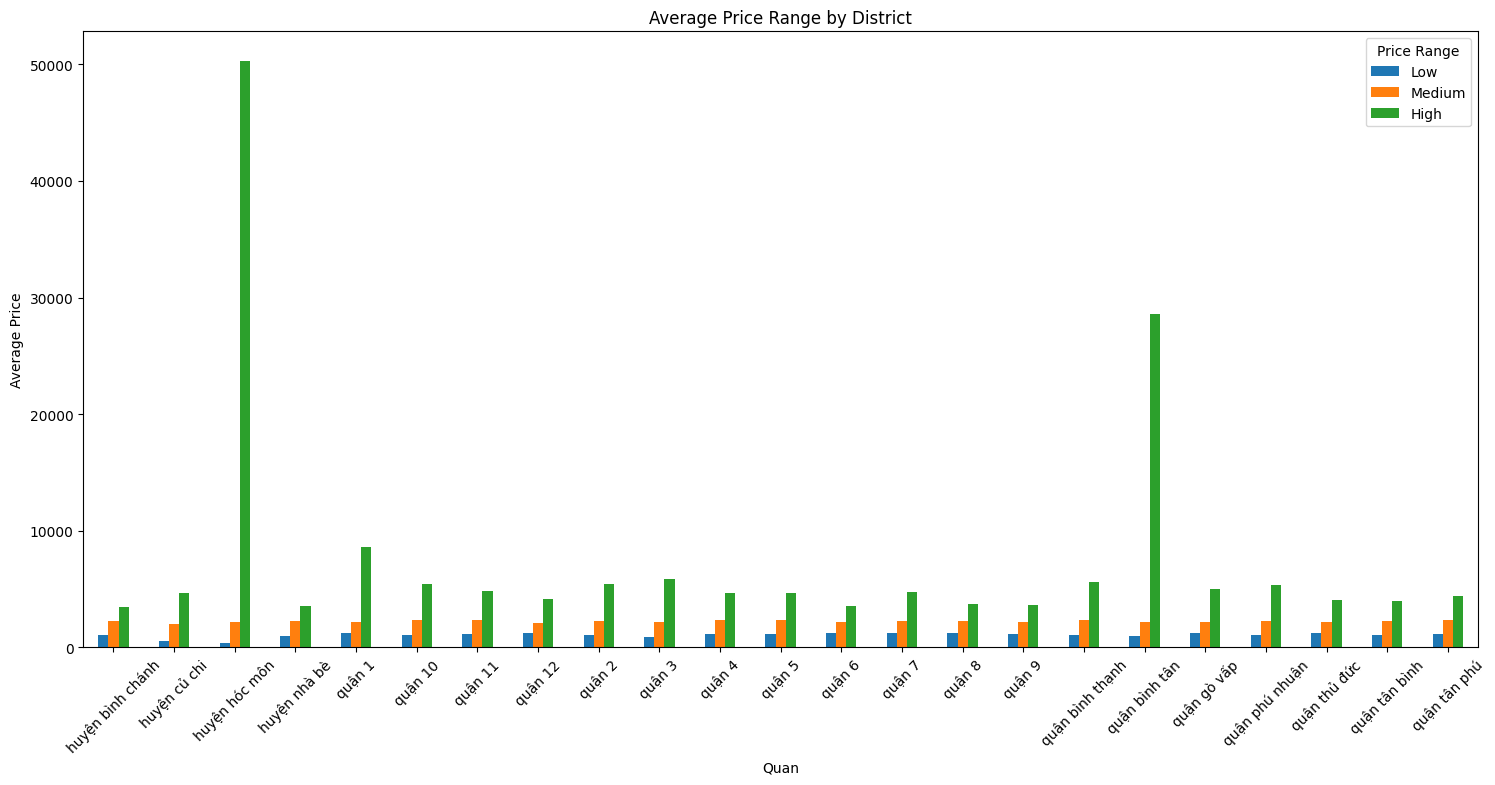

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả định df_cleaned đã được định nghĩa và có cột 'Gia' và cột 'Quan'

# Phân loại giá thành ba khoảng
df_cleaned['range'] = pd.qcut(df_cleaned['Gia'], q=3, labels=['Low', 'Medium', 'High'])

def Analyst(col):
    temp = df_cleaned.copy()

    # Nhóm dữ liệu theo quận và khoảng giá, tính giá trung bình
    df_grouped = temp.groupby([col, 'range'])['Gia'].mean().unstack(fill_value=0)

    # Vẽ biểu đồ cột
    plt.rcParams['figure.figsize'] = (18, 8)
    df_grouped.plot.bar()
    plt.title('Average Price Range by District')
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
    plt.legend(title='Price Range')
    plt.show()

# Gọi hàm với cột "Quan"
Analyst('Quan')


In [ ]:
# Tính các giá trị cần thiết
Q1 = df_cleaned['Gia'].quantile(0.25)  # Quartile 1
Q3 = df_cleaned['Gia'].quantile(0.75)  # Quartile 3
IQR = Q3 - Q1  # Interquartile Range

# Xác định ngưỡng outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các giá trị vượt quá ngưỡng
outliers = df_cleaned[df_cleaned['Gia'] > upper_bound]

print("Danh sách các giá trị cao đột biến:")
outliers


Danh sách các giá trị cao đột biến:


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2,range
25,"90A, 90A Đường Lý Thường Kiệt, Phường 14, Quận...",quận 10,đã bàn giao,89.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5700.0,12.377923,14,64.044944,High
50,"200 đường 3 tháng 2, Phường 12, Quận 10, Tp Hồ...",quận 10,đã bàn giao,87.0,2.0,2.0,chung cư,Đang chờ sổ,Nội thất đầy đủ,6500.0,12.509258,12,74.712644,High
62,"10, 10 Đường Mai Chí Thọ, Phường An Lợi Đông, ...",quận 2,đã bàn giao,120.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,10500.0,12.988832,an lợi đông,87.500000,High
85,"130-132, 130-132 Đường Hồng Hà, Phường 9, Quận...",quận phú nhuận,đã bàn giao,98.0,2.0,2.0,chung cư,Đang chờ sổ,Nội thất đầy đủ,6200.0,12.462005,9,63.265306,High
91,"Đường Phú Mỹ Hưng, Phường Tân Phong, Quận 7, T...",quận 7,đã bàn giao,194.0,3.0,3.0,penthouse,Đã có sổ,Nội thất cao cấp,7000.0,12.583368,tân phong,36.082474,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17390,"Đường Mai Chí Thọ, Phường Bình Trưng Tây, Quận...",quận 2,đã bàn giao,89.0,2.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,6000.0,12.429216,bình trưng tây,67.415730,High
17434,"Đường Trần Thái Tông, Phường 15, Quận Tân Bình...",quận tân bình,đã bàn giao,48.0,4.0,6.0,duplex,Đã có sổ,Hoàn thiện cơ bản,7500.0,12.652360,15,156.250000,High
17450,"Đường D1, Phường 25, Quận Bình Thạnh, Tp Hồ Ch...",quận bình thạnh,đã bàn giao,90.0,1.0,1.0,officetel,Đã có sổ,Hoàn thiện cơ bản,8900.0,12.823507,25,98.888889,High
17472,"51, 51 Đường Nguyễn Thị Minh Khai, Phường Bến ...",quận 1,đã bàn giao,93.0,2.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,8500.0,12.777524,bến nghé,91.397849,High


In [ ]:
# Tính giá trị trung bình và độ lệch chuẩn
mean = df_cleaned['Gia'].mean()
std = df_cleaned['Gia'].std()

# Xác định ngưỡng outliers (ví dụ: lớn hơn mean + 3*std)
threshold = mean + 3 * std
outliers = df_cleaned[df_cleaned['Gia'] > threshold]

print("Danh sách các giá trị cao đột biến:")
outliers


Danh sách các giá trị cao đột biến:


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2,range
217,"Đường Nguyễn Hữu Cảnh, Phường 22, Quận Bình Th...",quận bình thạnh,đã bàn giao,358.00,5.0,5.0,duplex,Đã có sổ,Hoàn thiện cơ bản,40000.0,14.326336,22,111.731844,High
557,"đường Tôn Đức Thắng, Phường Bến Nghé, Quận 1, ...",quận 1,đã bàn giao,159.00,4.0,3.0,chung cư,Đang chờ sổ,Nội thất đầy đủ,33000.0,14.133964,bến nghé,207.547170,High
875,"Đường Thống Nhất, Phường 11, Quận Gò Vấp, Tp H...",quận gò vấp,đã bàn giao,500.00,11.0,7.0,"căn hộ dịch vụ, mini",Đã có sổ,Nội thất cao cấp,60000.0,14.731801,11,120.000000,High
1293,"208, 208 Đường Nguyễn Hữu Cảnh, Phường 22, Quậ...",quận bình thạnh,đã bàn giao,300.00,4.0,4.0,duplex,Đã có sổ,Hoàn thiện cơ bản,34500.0,14.178416,22,115.000000,High
1873,"Lô 1.16 và 1.17, Lô 1.16 và 1.17 Khu đô thị Th...",quận 2,chưa bàn giao,170.00,4.0,4.0,chung cư,Giấy tờ khác,Hoàn thiện cơ bản,30000.0,14.038654,an khánh,176.470588,High
2376,"Đường N1, Phường Sơn Kỳ, Quận Tân Phú, Tp Hồ C...",quận tân phú,chưa bàn giao,440.00,1.0,1.0,chung cư,Giấy tờ khác,Bàn giao thô,37000.0,14.248375,sơn kỳ,84.090909,High
3276,"Đường Lê Văn Quới, Phường Bình Hưng Hoà A, Quậ...",quận bình tân,đã bàn giao,40.00,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,980000.0,17.525009,bình hưng hoà a,24500.000000,High
4613,"Đường Võ Văn Ngân, Phường Trường Thọ, Quận Thủ...",quận thủ đức,đã bàn giao,220.00,3.0,3.0,duplex,Đã có sổ,Nội thất cao cấp,40000.0,14.326336,trường thọ,181.818182,High
6145,"Đường Nguyễn Trọng Tuyển, Phường 1, Quận Tân B...",quận tân bình,chưa bàn giao,192.60,5.0,2.0,"căn hộ dịch vụ, mini",Đã có sổ,Nội thất đầy đủ,43000.0,14.398657,1,223.260644,High
6865,"Đường Xa Lộ Hà Nội, Phường Thảo Điền, Quận 2, ...",quận 2,đã bàn giao,218.00,4.0,4.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,31000.0,14.071444,thảo điền,142.201835,High


In [ ]:
# Tìm giá cao nhất cho từng quận
max_price_per_district = df_cleaned.groupby('Quan')['Gia'].max().reset_index()
max_price_per_district.rename(columns={'Gia': 'Max_Gia'}, inplace=True)

# Lọc các căn chung cư có giá bằng giá cao nhất của từng quận
result = df_cleaned.merge(max_price_per_district, how='inner', left_on=['Quan', 'Gia'], right_on=['Quan', 'Max_Gia'])

# Xuất kết quả
print("Danh sách các căn chung cư có giá cao nhất theo từng quận:")
result




Danh sách các căn chung cư có giá cao nhất theo từng quận:


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2,range,Max_Gia
0,"Đường Nguyễn Hữu Cảnh, Phường 22, Quận Bình Th...",quận bình thạnh,đã bàn giao,358.00,5.0,5.0,duplex,Đã có sổ,Hoàn thiện cơ bản,40000.0,14.326336,22,111.731844,High,40000.0
1,"Đường Thống Nhất, Phường 11, Quận Gò Vấp, Tp H...",quận gò vấp,đã bàn giao,500.00,11.0,7.0,"căn hộ dịch vụ, mini",Đã có sổ,Nội thất cao cấp,60000.0,14.731801,11,120.000000,High,60000.0
2,"149, Đường Quốc Lộ 22, Xã Tân An Hội, Huyện Củ...",huyện củ chi,chưa bàn giao,480.00,4.0,2.0,"căn hộ dịch vụ, mini",Đã có sổ,Nội thất cao cấp,8000.0,12.716897,tân an hội,16.666667,High,8000.0
3,"Số 1472, Số 1472 Đường Võ Văn Kiệt, Phường 3, ...",quận 6,đã bàn giao,350.00,5.0,3.0,penthouse,Đã có sổ,Nội thất cao cấp,18600.0,13.560618,3,53.142857,High,18600.0
4,"Đường Tú Xương, Phường Phước Long B, Quận 9, T...",quận 9,chưa bàn giao,250.00,5.0,5.0,"căn hộ dịch vụ, mini",Đang chờ sổ,Bàn giao thô,21000.0,13.681979,phước long b,84.000000,High,21000.0
5,"Đường Lê Văn Lương, Xã Phước Kiển, Huyện Nhà B...",huyện nhà bè,đã bàn giao,187.00,10.0,7.0,"căn hộ dịch vụ, mini",Đã có sổ,Nội thất đầy đủ,9000.0,12.834681,phước kiển,48.128342,High,9000.0
6,"Đường N1, Phường Sơn Kỳ, Quận Tân Phú, Tp Hồ C...",quận tân phú,chưa bàn giao,440.00,1.0,1.0,chung cư,Giấy tờ khác,Bàn giao thô,37000.0,14.248375,sơn kỳ,84.090909,High,37000.0
7,"Đường Lê Hồng Phong, Phường 2, Quận 10, Tp Hồ ...",quận 10,chưa bàn giao,100.00,2.0,2.0,duplex,Đã có sổ,Nội thất đầy đủ,21000.0,13.681979,2,210.000000,High,21000.0
8,"Đường Lê Văn Quới, Phường Bình Hưng Hoà A, Quậ...",quận bình tân,đã bàn giao,40.00,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,980000.0,17.525009,bình hưng hoà a,24500.000000,High,980000.0
9,"Đường Võ Văn Ngân, Phường Trường Thọ, Quận Thủ...",quận thủ đức,đã bàn giao,220.00,3.0,3.0,duplex,Đã có sổ,Nội thất cao cấp,40000.0,14.326336,trường thọ,181.818182,High,40000.0


In [ ]:
df_cleaned = df_cleaned[
    ~(
        (df_cleaned['Gia'] == 275000.0) &
        (df_cleaned['Quan'].str.lower() == 'huyện hóc môn') &
        (df_cleaned['range'] == 'High')
    )
]

In [ ]:
df_cleaned = df_cleaned[
    ~(
        (df_cleaned['Gia'] == 980000.0) &
        (df_cleaned['Quan'].str.lower() == 'quận bình tân') &
        (df_cleaned['range'] == 'High')
    )
]


In [ ]:
df_cleaned = df_cleaned[
    ~(
        (df_cleaned['Gia'] == 530000.0) &
        (df_cleaned['Quan'].str.lower() == 'quận bình tân') &
        (df_cleaned['range'] == 'High')
    )
]


<ipython-input-56-d1decd2492f5>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = temp.groupby([col, 'range'])['Gia'].mean().unstack(fill_value=0)


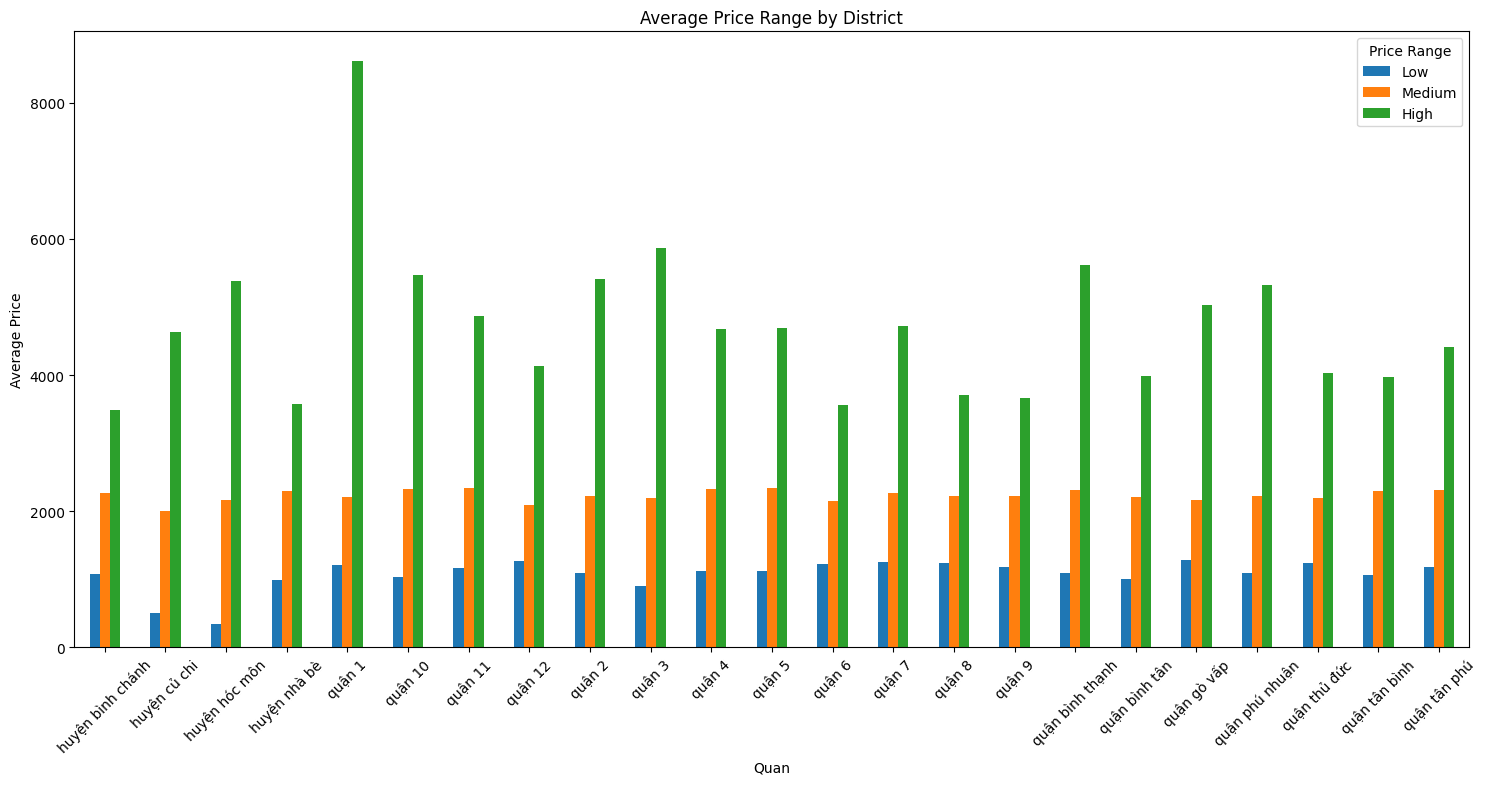

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả định df_cleaned đã được định nghĩa và có cột 'Gia' và cột 'Quan'

# Phân loại giá thành ba khoảng
df_cleaned['range'] = pd.qcut(df_cleaned['Gia'], q=3, labels=['Low', 'Medium', 'High'])

def Analyst(col):
    temp = df_cleaned.copy()

    # Nhóm dữ liệu theo quận và khoảng giá, tính giá trung bình
    df_grouped = temp.groupby([col, 'range'])['Gia'].mean().unstack(fill_value=0)

    # Vẽ biểu đồ cột
    plt.rcParams['figure.figsize'] = (18, 8)
    df_grouped.plot.bar()
    plt.title('Average Price Range by District')
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
    plt.legend(title='Price Range')
    plt.show()

# Gọi hàm với cột "Quan"
Analyst('Quan')


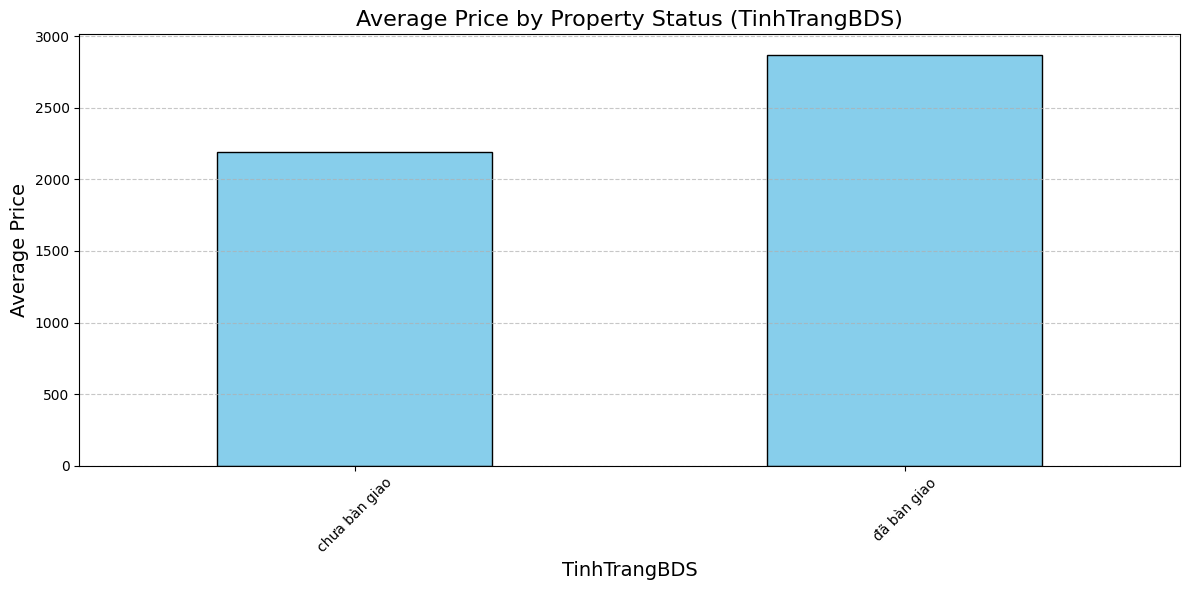

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_tinhtrang_vs_gia():
    temp = df_cleaned.copy()

    # Nhóm dữ liệu theo TinhTrangBDS và tính giá trung bình
    df_grouped = temp.groupby('TinhTrangBDS')['Gia'].mean()

    # Vẽ biểu đồ cột
    plt.rcParams['figure.figsize'] = (12, 6)
    df_grouped.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Price by Property Status (TinhTrangBDS)', fontsize=16)
    plt.xlabel('TinhTrangBDS', fontsize=14)
    plt.ylabel('Average Price', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Gọi hàm
analyze_tinhtrang_vs_gia()


<ipython-input-58-ecc5a892a282>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = temp.groupby(['Quan', 'range'])['DienTich'].mean().unstack(fill_value=0)


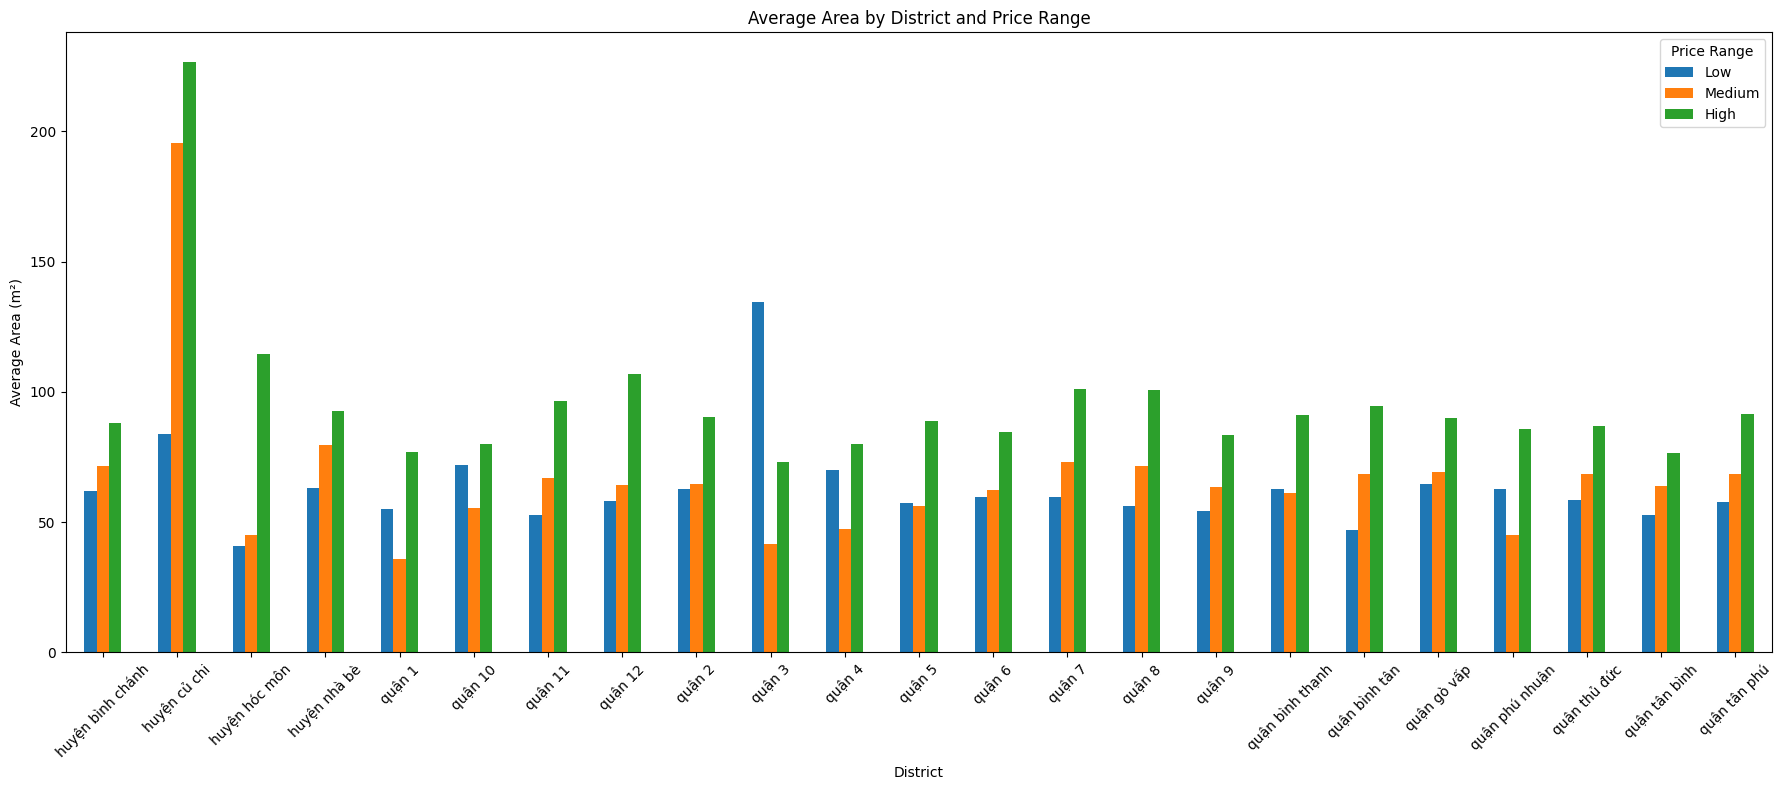

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_area_by_district_and_price_range():
    temp = df_cleaned.copy()

    # Nhóm dữ liệu theo Quận và Phân khúc giá, tính diện tích trung bình
    df_grouped = temp.groupby(['Quan', 'range'])['DienTich'].mean().unstack(fill_value=0)

    # Vẽ biểu đồ cột
    df_grouped.plot(kind='bar', figsize=(18, 8))
    plt.title('Average Area by District and Price Range')
    plt.xlabel('District')
    plt.ylabel('Average Area (m²)')
    plt.xticks(rotation=45)
    plt.legend(title='Price Range')
    plt.tight_layout()
    plt.show()

# Gọi hàm
analyze_area_by_district_and_price_range()


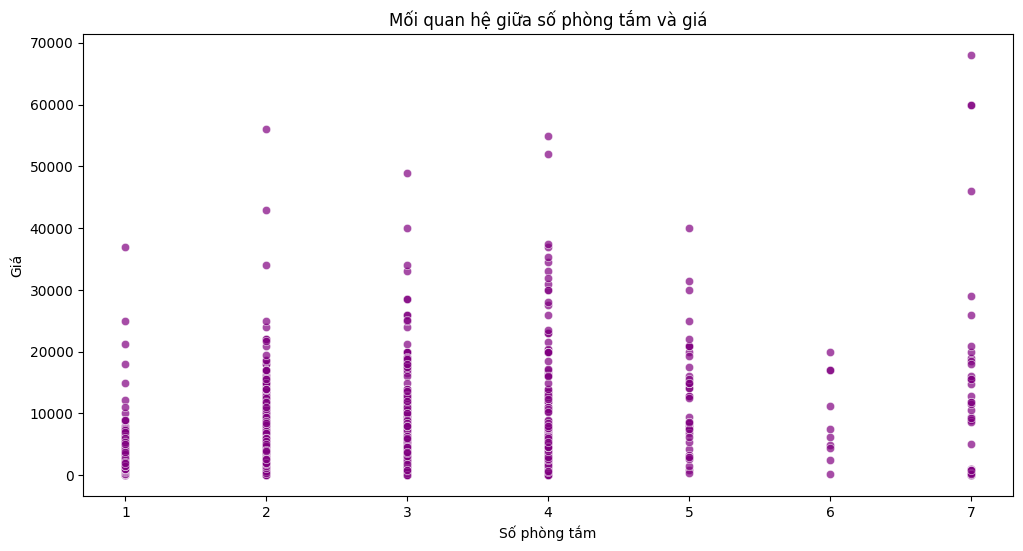

In [ ]:
sns.scatterplot(x='PhongTam', y='Gia', data=df_cleaned, color='purple', alpha=0.7)
plt.title('Mối quan hệ giữa số phòng tắm và giá')
plt.xlabel('Số phòng tắm')
plt.ylabel('Giá')
plt.show()

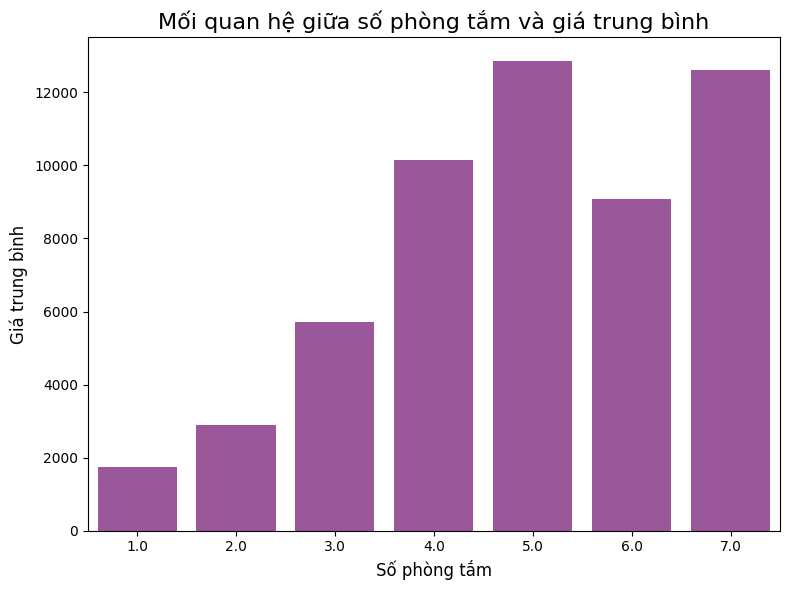

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá trung bình theo số phòng tắm
average_price_per_bathroom = df_cleaned.groupby('PhongTam')['Gia'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='PhongTam', y='Gia', data=average_price_per_bathroom, color='purple', alpha=0.7)
plt.title('Mối quan hệ giữa số phòng tắm và giá trung bình', fontsize=16)
plt.xlabel('Số phòng tắm', fontsize=12)
plt.ylabel('Giá trung bình', fontsize=12)
plt.tight_layout()
plt.show()


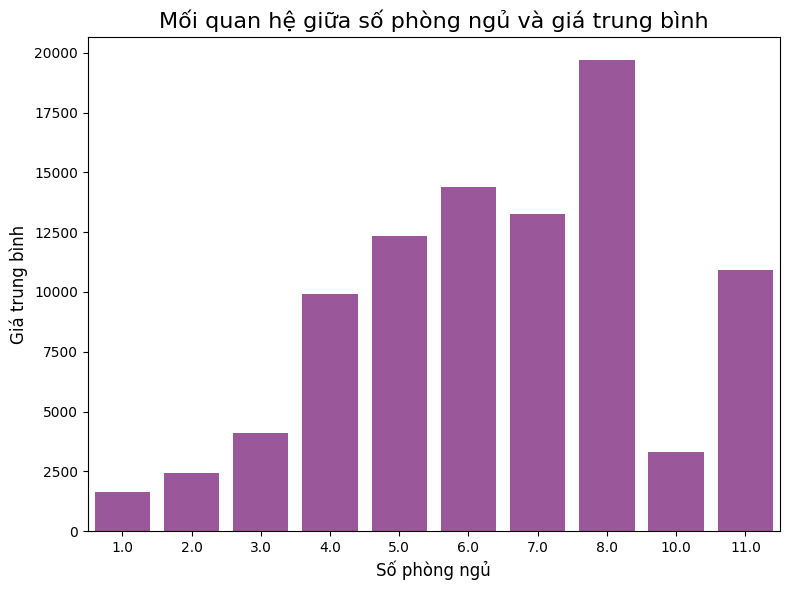

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá trung bình theo số phòng tắm
average_price_per_bathroom = df_cleaned.groupby('Phongngu')['Gia'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='Phongngu', y='Gia', data=average_price_per_bathroom, color='purple', alpha=0.7)
plt.title('Mối quan hệ giữa số phòng ngủ và giá trung bình', fontsize=16)
plt.xlabel('Số phòng ngủ', fontsize=12)
plt.ylabel('Giá trung bình', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Lọc các căn hộ có 1 phòng tắm
filtered_df = df_cleaned[df_cleaned['PhongTam'] == 1]

# Sắp xếp theo giá giảm dần và lấy 5 giá trị đầu tiên
result = filtered_df.sort_values(by='Gia', ascending=False).head(5)

# Xuất kết quả
print("Danh sách 5 căn hộ 1 phòng tắm có giá cao nhất:")
result


Danh sách 5 căn hộ 1 phòng tắm có giá cao nhất:


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2,range
2376,"Đường N1, Phường Sơn Kỳ, Quận Tân Phú, Tp Hồ C...",quận tân phú,chưa bàn giao,440.0,1.0,1.0,chung cư,Giấy tờ khác,Bàn giao thô,37000.000000,14.248375,sơn kỳ,84.090909,High
11571,"208, 208 Đường Nguyễn Hữu Cảnh, Phường 22, Quậ...",quận bình thạnh,đã bàn giao,300.0,1.0,1.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,25000.000000,13.856333,22,83.333333,High
15065,"Đường Nguyễn Hữu Thọ, Phường Tân Hưng, Quận 7,...",quận 7,đã bàn giao,227.0,1.0,1.0,chung cư,Đã có sổ,Bàn giao thô,21217.294588,13.692273,tân hưng,93.468258,High
12410,"Đường Phan Chu Trinh, Phường Bến Thành, Quận 1...",quận 1,đã bàn giao,109.0,1.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,18000.000000,13.527828,bến thành,165.137615,High
12145,"Đường Lê Thánh Tôn, Phường Bến Thành, Quận 1, ...",quận 1,đã bàn giao,64.0,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,15000.000000,13.345507,bến thành,234.375000,High


In [ ]:
df_cleaned

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,log_price,Phuong_Xa,Gia_m2,range
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",quận 7,đã bàn giao,62.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2000.0,11.330600,phú thuận,32.258065,Medium
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",quận 7,đã bàn giao,95.0,3.0,2.0,chung cư,Đang chờ sổ,Nội thất cao cấp,5300.0,12.305162,tân thuận tây,55.789474,High
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",quận bình tân,chưa bàn giao,75.0,2.0,2.0,chung cư,Giấy tờ khác,Hoàn thiện cơ bản,2580.0,11.585246,an lạc,34.400000,Medium
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",quận tân bình,đã bàn giao,70.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,4000.0,12.023753,2,57.142857,High
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",quận 6,đã bàn giao,83.0,2.0,2.0,chung cư,Đã có sổ,Nội thất cao cấp,2950.0,11.719265,11,35.542169,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,"334, 334 Đường Tô Hiến Thành, Phường 14, Quận ...",quận 10,đã bàn giao,48.0,1.0,1.0,chung cư,Đang chờ sổ,Nội thất cao cấp,3799.0,11.972197,14,79.145833,High
17531,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",quận 9,đã bàn giao,53.0,2.0,1.0,chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2100.0,11.379394,hiệp phú,39.622642,Medium
17532,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",huyện bình chánh,đã bàn giao,76.0,2.0,1.0,chung cư,Đã có sổ,Nội thất cao cấp,1550.0,11.075706,bình hưng,20.394737,Low
17533,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",quận bình thạnh,đã bàn giao,82.0,2.0,2.0,chung cư,Đã có sổ,Nội thất đầy đủ,2650.0,11.612019,13,32.317073,Medium


In [ ]:
df_cleaned.to_csv('data_clear.csv', index=False, encoding='utf-8')

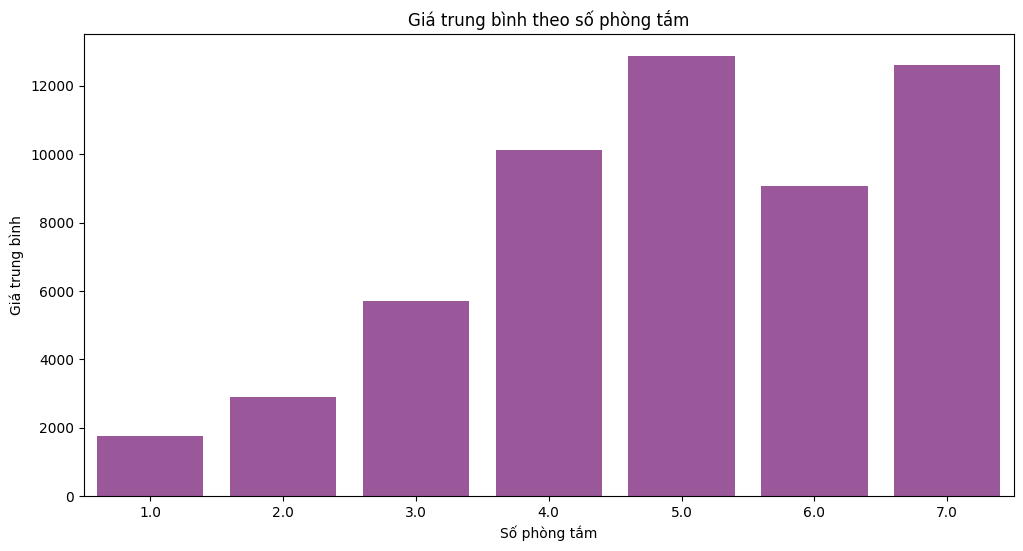

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính giá trung bình theo số phòng tắm
avg_price_per_bathroom = df_cleaned.groupby('PhongTam')['Gia'].mean().reset_index()

# Vẽ biểu đồ
sns.barplot(x='PhongTam', y='Gia', data=avg_price_per_bathroom, color='purple', alpha=0.7)
plt.title('Giá trung bình theo số phòng tắm')
plt.xlabel('Số phòng tắm')
plt.ylabel('Giá trung bình')
plt.show()


#4. Phân tích các biến

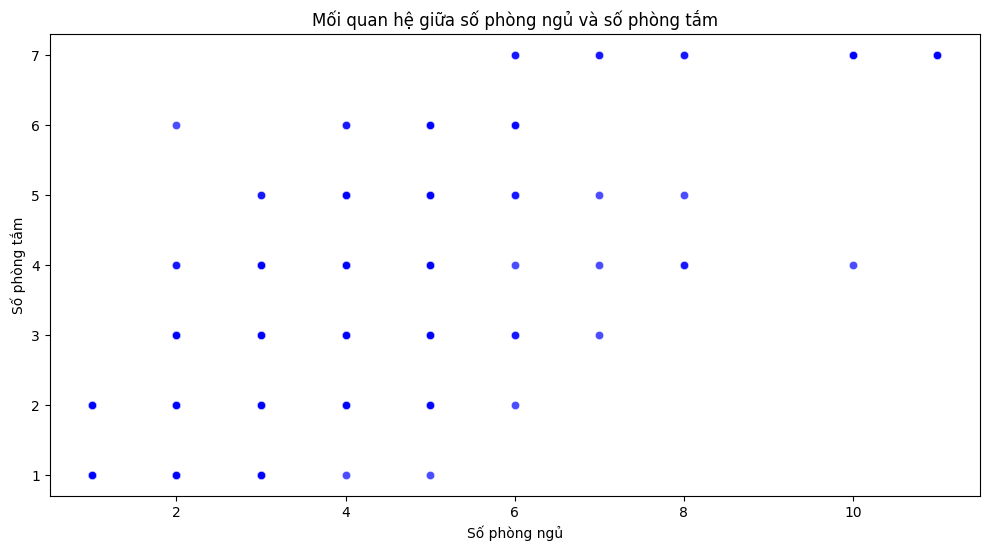

In [ ]:
sns.scatterplot(x='Phongngu', y='PhongTam', data=df, color='blue', alpha=0.7)
plt.title('Mối quan hệ giữa số phòng ngủ và số phòng tắm')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Số phòng tắm')
plt.show()

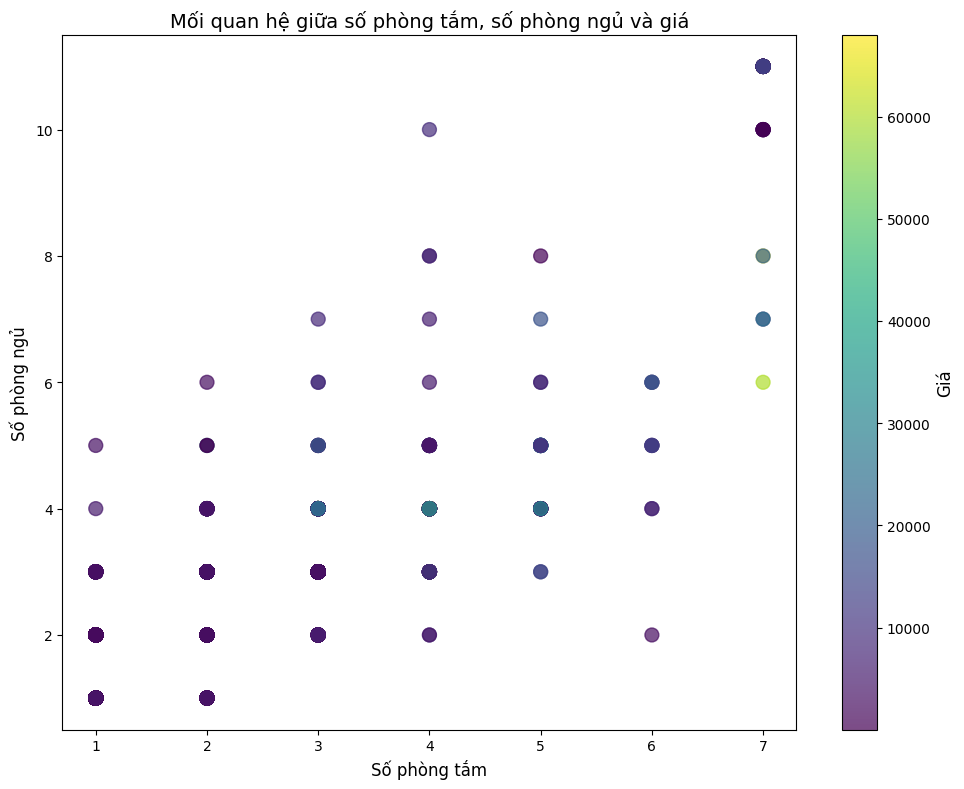

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_bathroom_bedroom_price(df):
    """
    Plots the relationship between bathrooms, bedrooms, and price.

    Args:
        df: Pandas DataFrame containing 'PhongTam', 'Phongngu', and 'Gia' columns.
    """
    plt.figure(figsize=(10, 8))

    # Scatter plot with plt.scatter to enable colorbar
    scatter = plt.scatter(
        x=df['PhongTam'],
        y=df['Phongngu'],
        c=df['Gia'],
        cmap='viridis',
        s=100,  # Size of the markers
        alpha=0.7
    )

    # Add colorbar
    colorbar = plt.colorbar(scatter)
    colorbar.set_label('Giá', fontsize=12)

    # Add labels and title
    plt.title('Mối quan hệ giữa số phòng tắm, số phòng ngủ và giá', fontsize=14)
    plt.xlabel('Số phòng tắm', fontsize=12)
    plt.ylabel('Số phòng ngủ', fontsize=12)

    plt.tight_layout()
    plt.show()

# Gọi hàm vẽ với DataFrame của bạn
plot_bathroom_bedroom_price(df_cleaned)


In [ ]:
# prompt: Giúp tôi xóa thuộc tính địa chỉ

# Assuming 'df_cleaned' is your DataFrame and 'DiaChi' is the column name for the address.
# If the column name is different, replace 'DiaChi' with the correct name.

if 'DiaChi' in df_cleaned.columns:
  df_cleaned = df_cleaned.drop('DiaChi', axis=1)
  print("Address column 'DiaChi' removed successfully.")
else:
  print("Column 'DiaChi' not found in the DataFrame.")


Address column 'DiaChi' removed successfully.


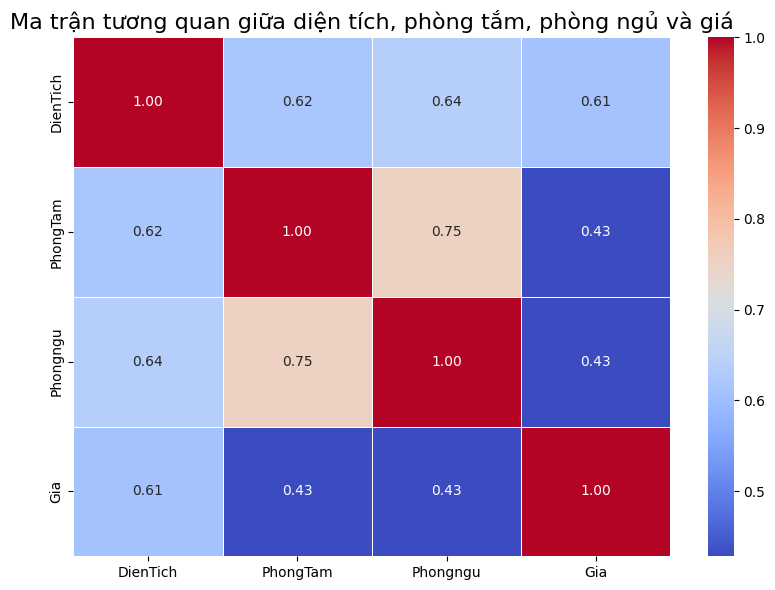

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_selected_correlation_matrix(df, columns):
    """
    Plots the correlation matrix of selected numerical attributes in the DataFrame.

    Args:
        df: Pandas DataFrame containing numerical columns.
        columns: List of columns to include in the correlation matrix.
    """
    # Lọc các cột số trong danh sách cụ thể
    selected_df = df[columns]

    # Tính ma trận tương quan
    correlation_matrix = selected_df.corr()

    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Hiển thị giá trị trên heatmap
        cmap='coolwarm',
        fmt='.2f',
        linewidths=0.5
    )

    # Thêm tiêu đề
    plt.title('Ma trận tương quan giữa diện tích, phòng tắm, phòng ngủ và giá', fontsize=16)
    plt.tight_layout()
    plt.show()

# Các cột cần chọn
selected_columns = ['DienTich', 'PhongTam', 'Phongngu', 'Gia']

# Gọi hàm với DataFrame của bạn
plot_selected_correlation_matrix(df_cleaned, selected_columns)


In [ ]:
# prompt: xuất ra các thuộc tính trong data đang có giúp tôi

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 0 to 17534
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Quan              17532 non-null  object  
 1   TinhTrangBDS      17532 non-null  object  
 2   DienTich          17532 non-null  float64 
 3   Phongngu          17532 non-null  float64 
 4   PhongTam          17532 non-null  float64 
 5   Loai              17532 non-null  object  
 6   GiayTo            17532 non-null  object  
 7   TinhTrangNoiThat  17532 non-null  object  
 8   Gia               17532 non-null  float64 
 9   log_price         17532 non-null  float64 
 10  Phuong_Xa         17532 non-null  object  
 11  Gia_m2            17532 non-null  float64 
 12  range             17532 non-null  category
dtypes: category(1), float64(6), object(6)
memory usage: 1.8+ MB


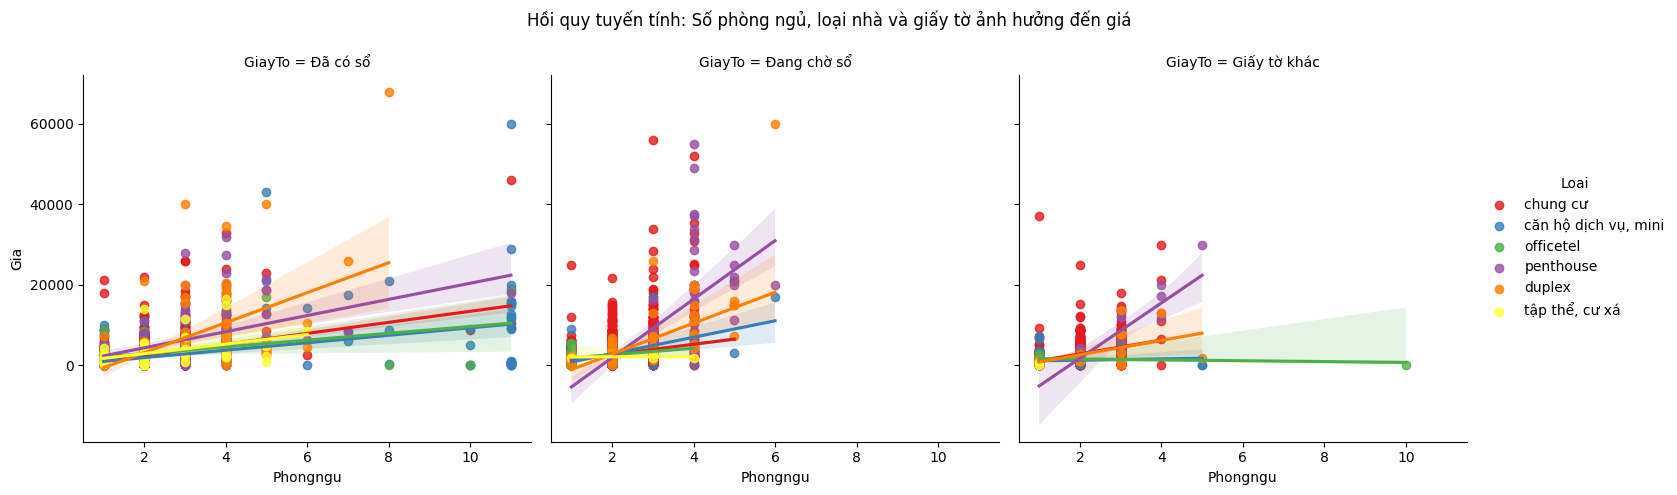

In [ ]:
# Vẽ biểu đồ hồi quy tuyến tính với các biến liên tục và phân loại
sns.lmplot(
    x='Phongngu',         # Trục x: Số phòng ngủ
    y='Gia',              # Trục y: Giá
    hue='Loai',           # Phân biệt bằng màu sắc theo loại nhà
    col='GiayTo',         # Tách biểu đồ theo giấy tờ
    data=df_cleaned,              # Dữ liệu đầu vào
    height=5,             # Chiều cao mỗi biểu đồ
    aspect=1,             # Tỉ lệ khung (1 = khung vuông)
    palette='Set1',       # Bảng màu cho loại nhà
    ci=95                 # Hiển thị khoảng tin cậy 95% cho đường hồi quy
)

# Điều chỉnh khoảng cách trên cho tiêu đề tổng
plt.subplots_adjust(top=0.85)

# Thêm tiêu đề chung cho toàn bộ biểu đồ
plt.suptitle('Hồi quy tuyến tính: Số phòng ngủ, loại nhà và giấy tờ ảnh hưởng đến giá')

# Hiển thị biểu đồ
plt.show()

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


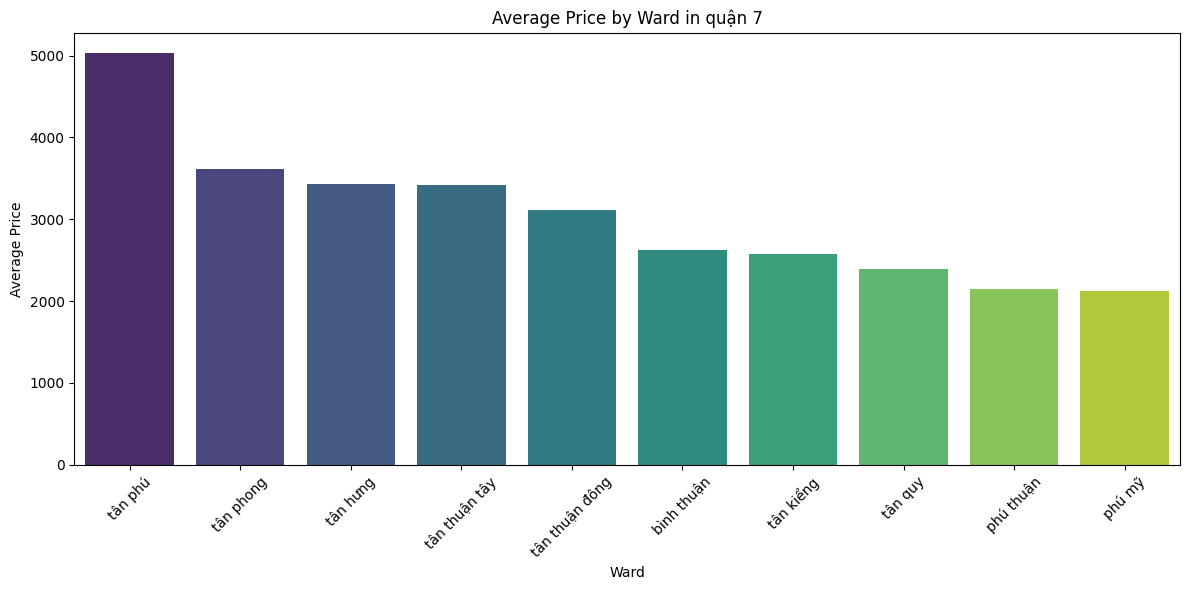

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


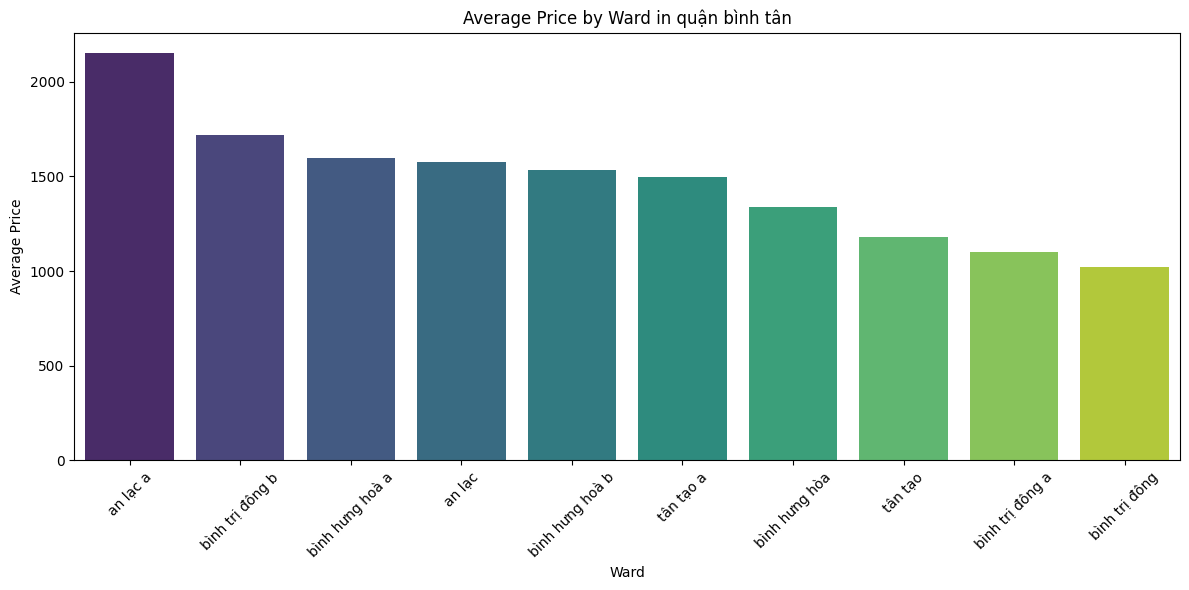

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


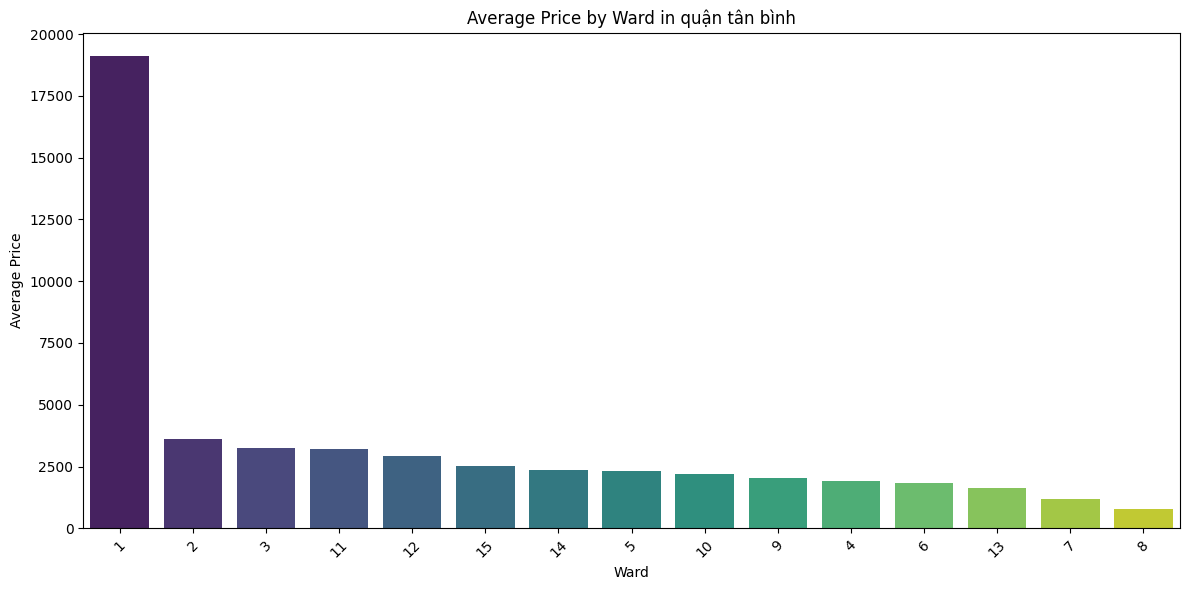

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


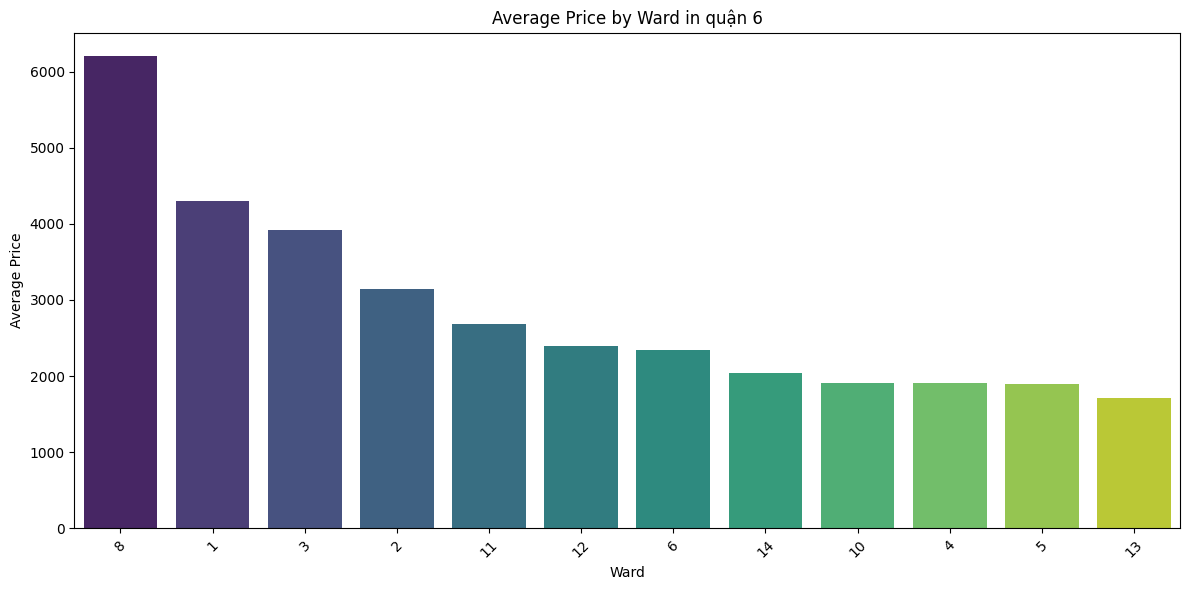

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


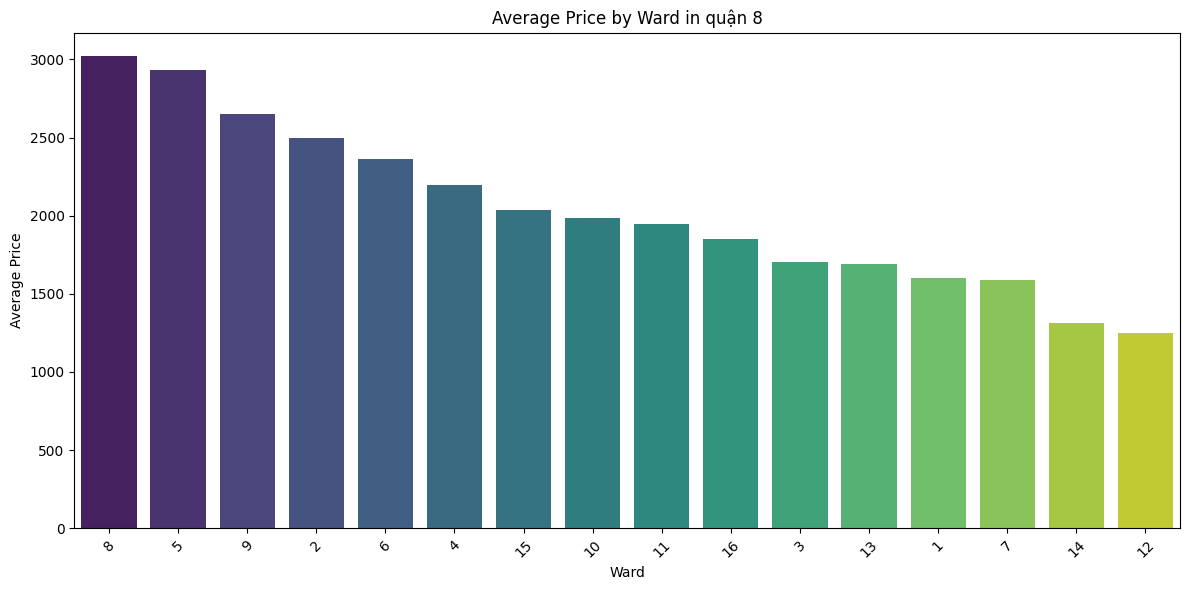

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


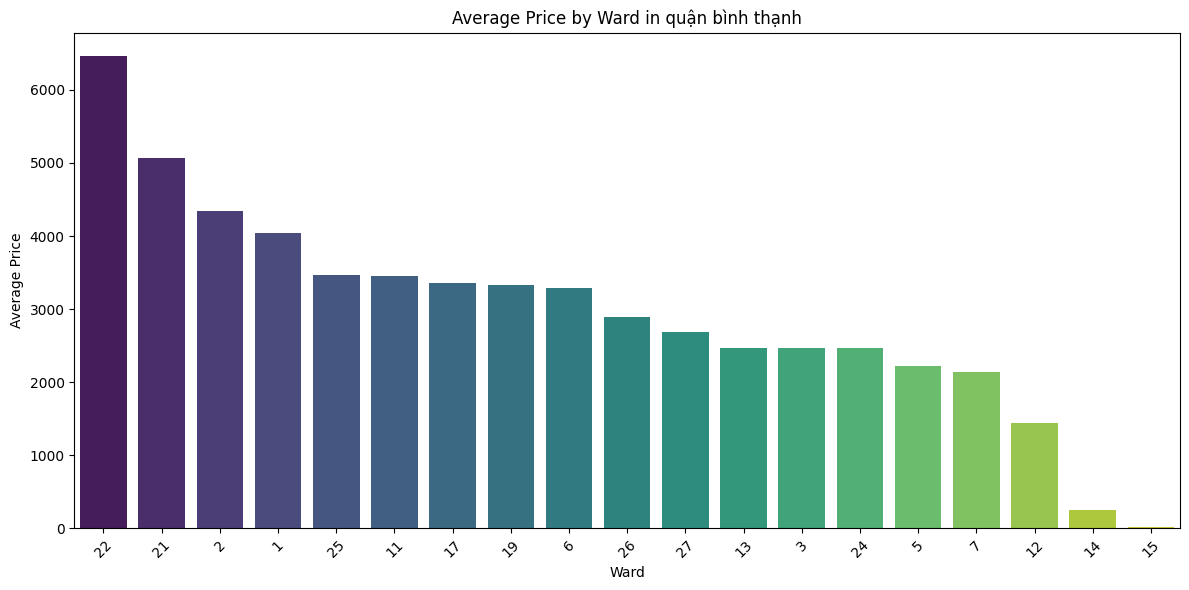

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


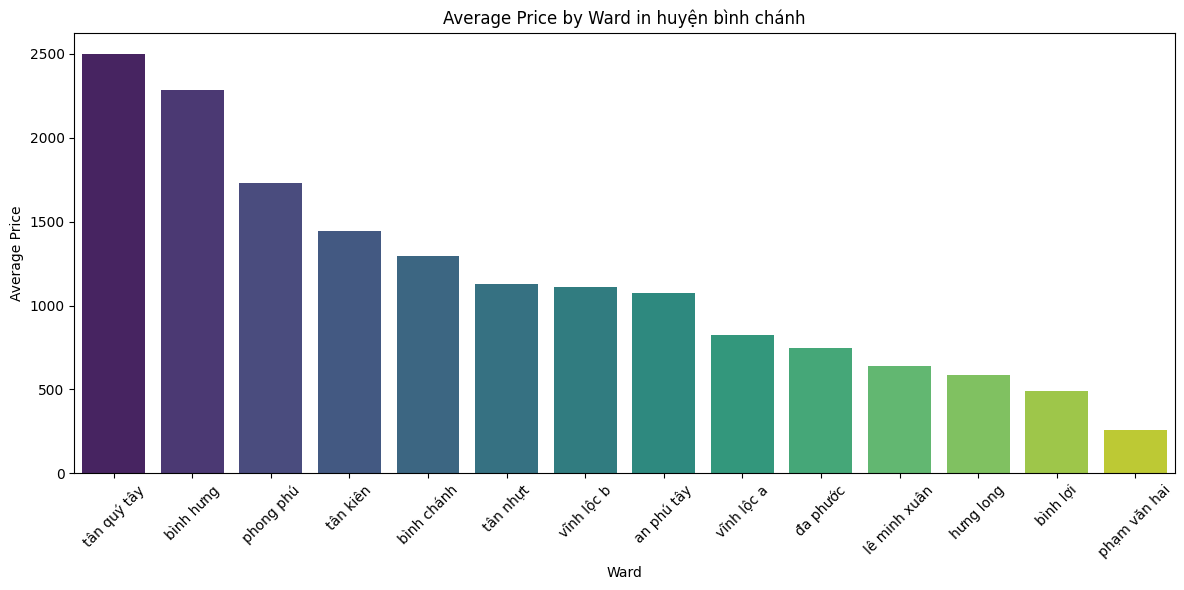

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


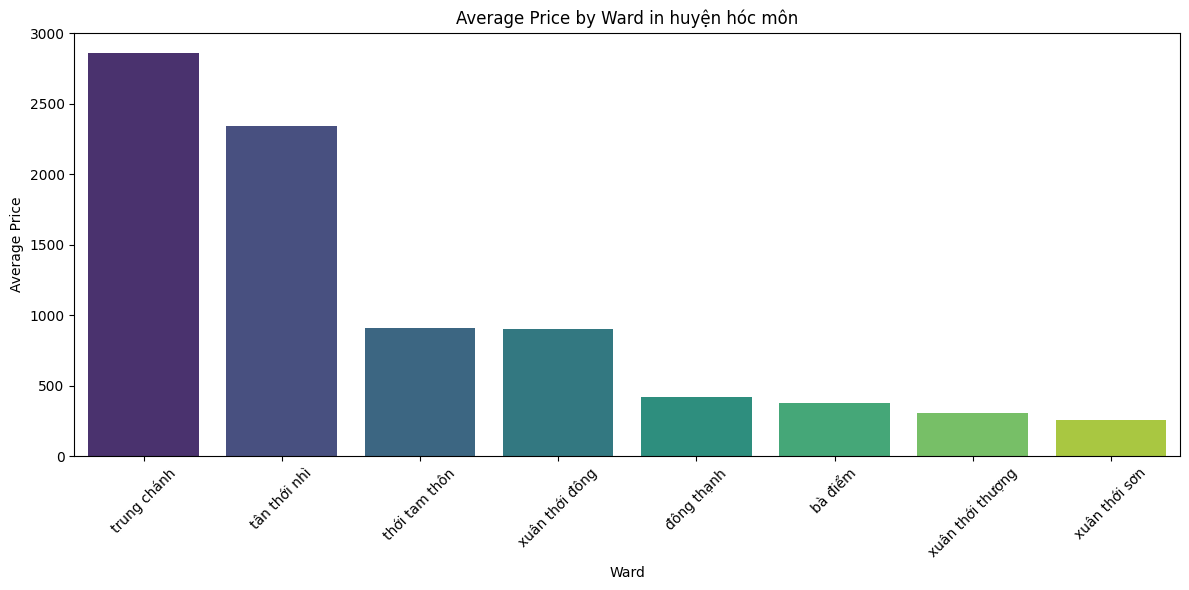

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


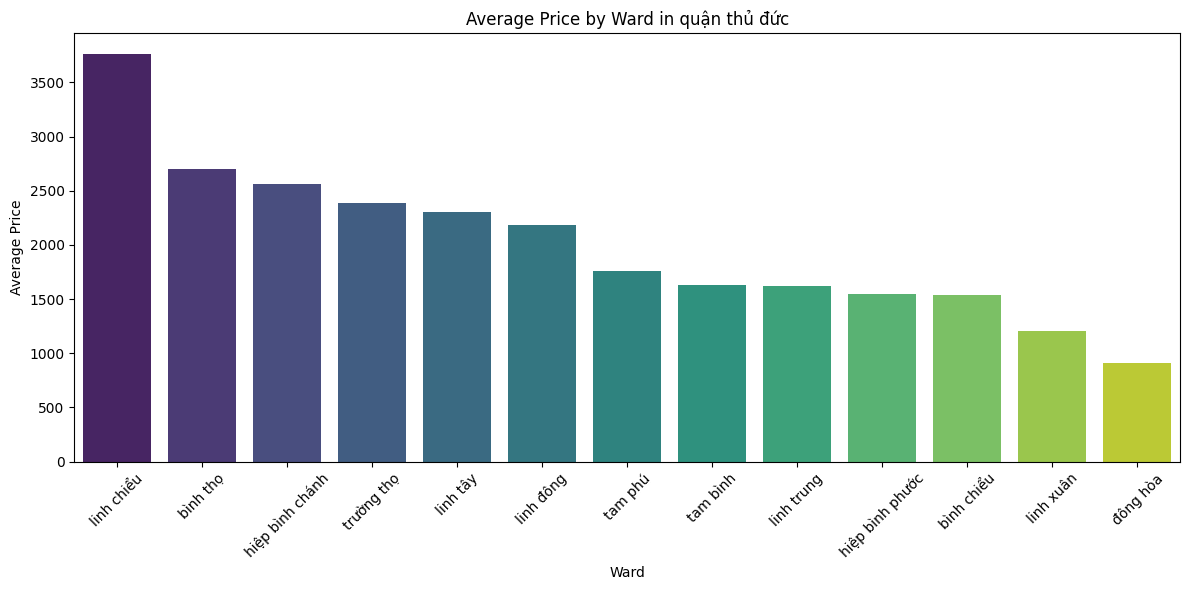

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


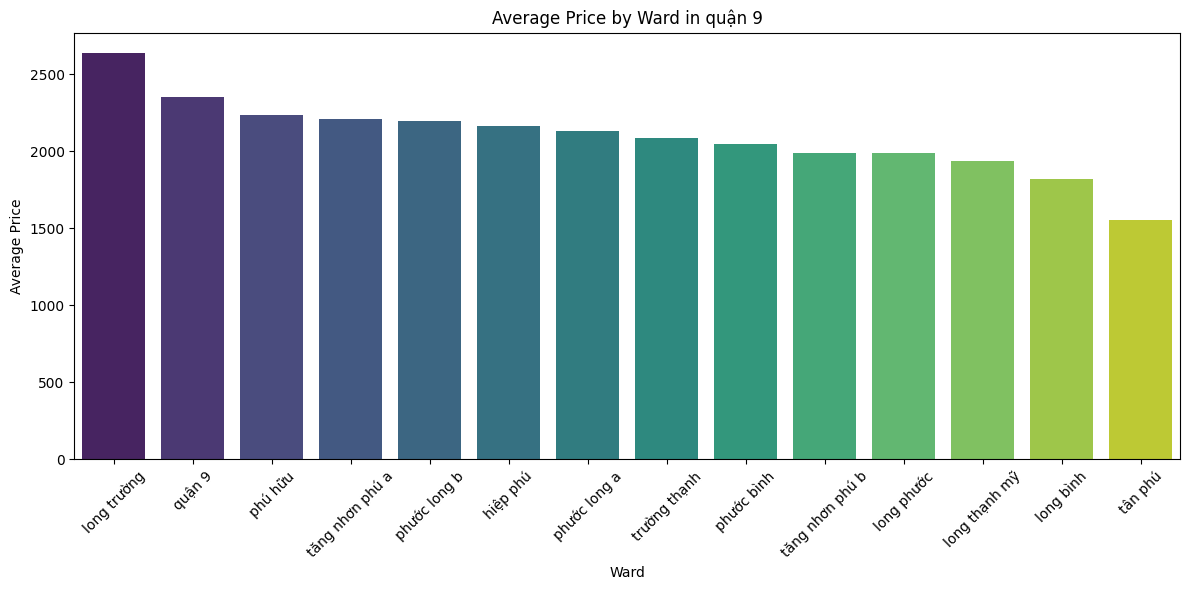

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


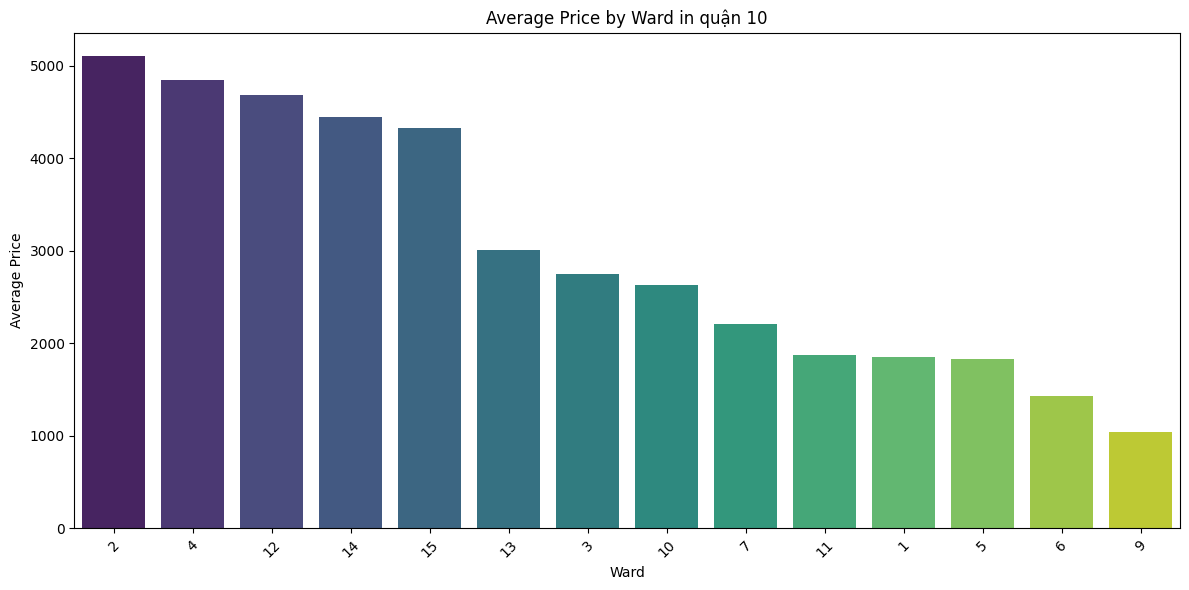

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


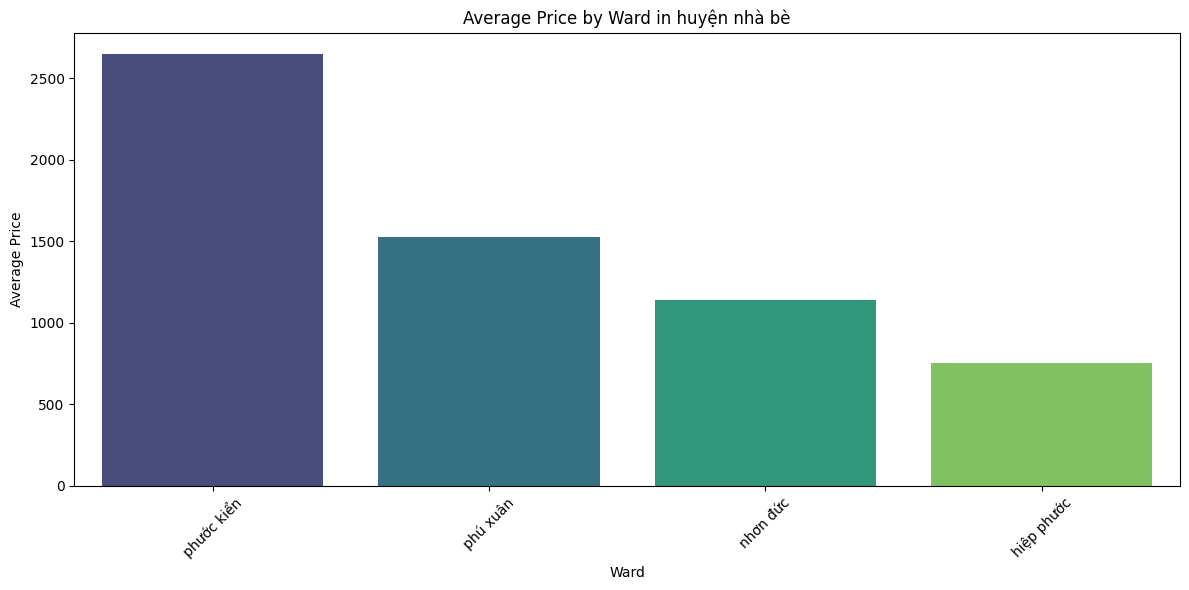

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


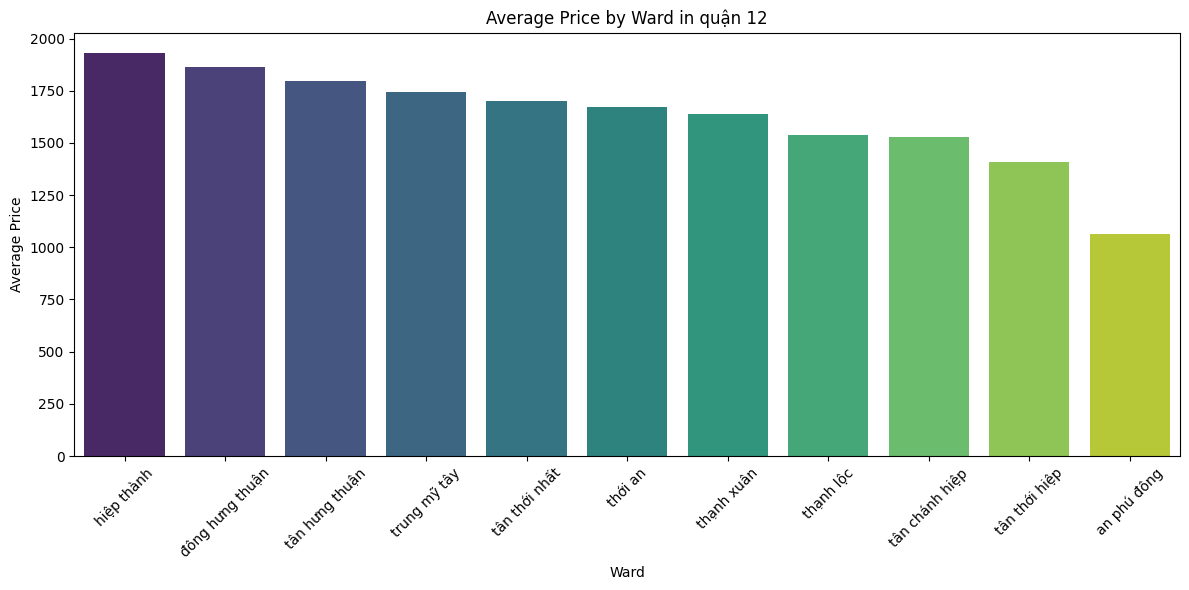

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


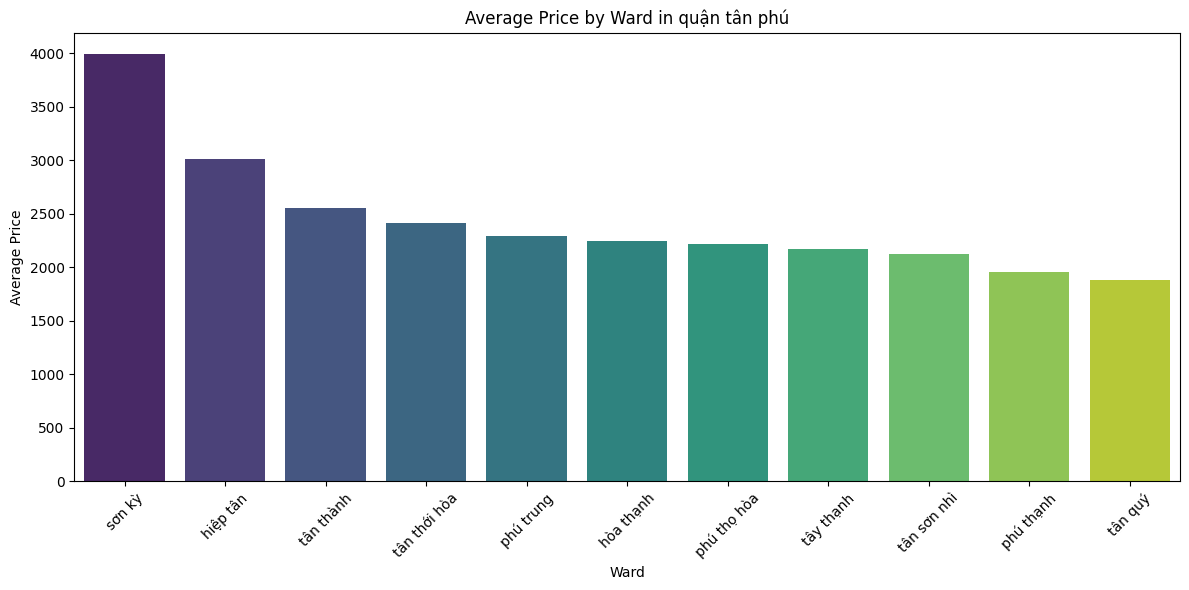

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


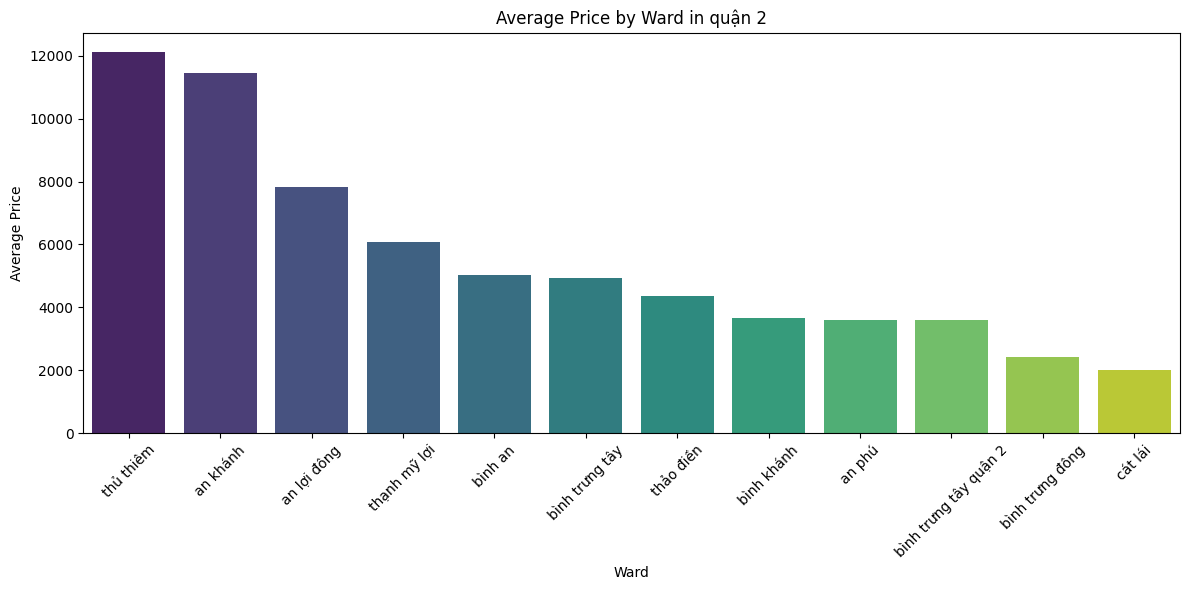

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


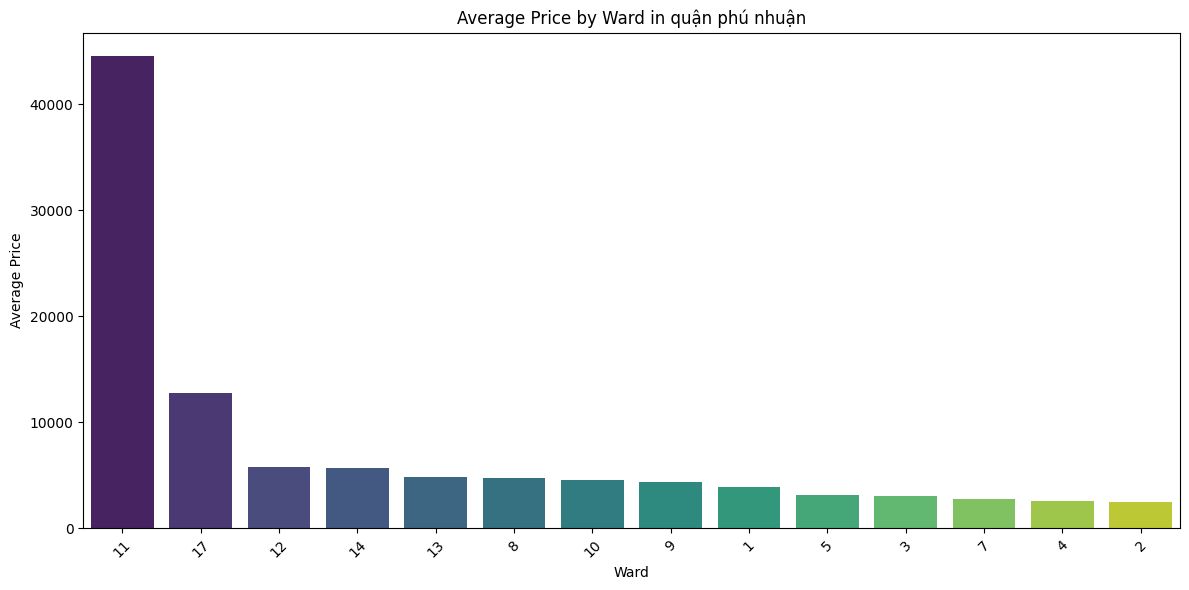

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


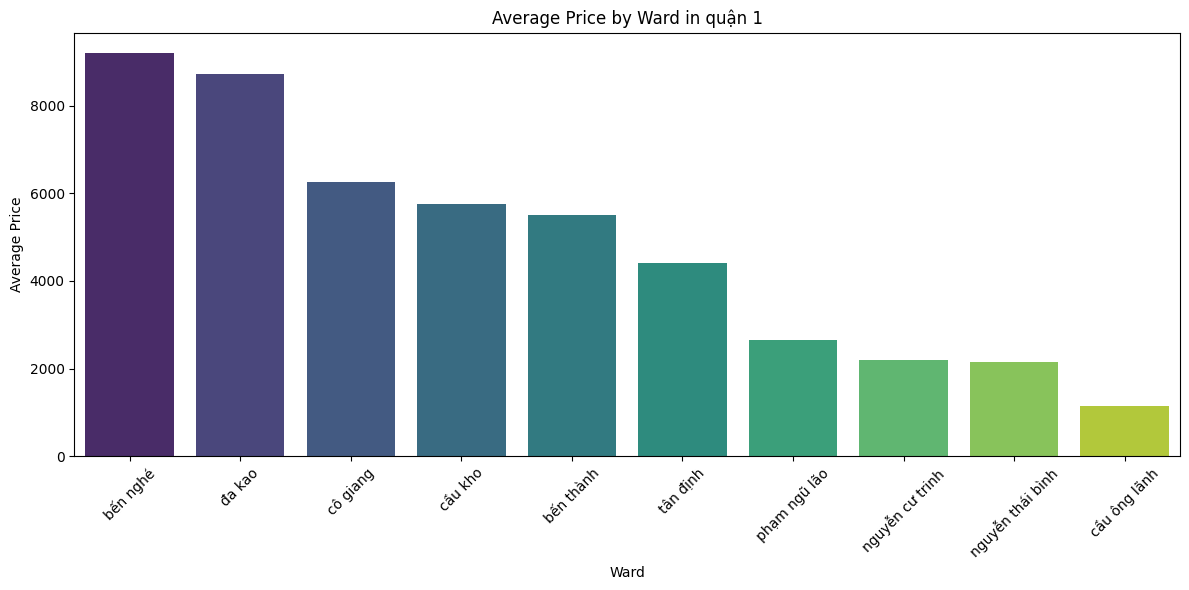

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


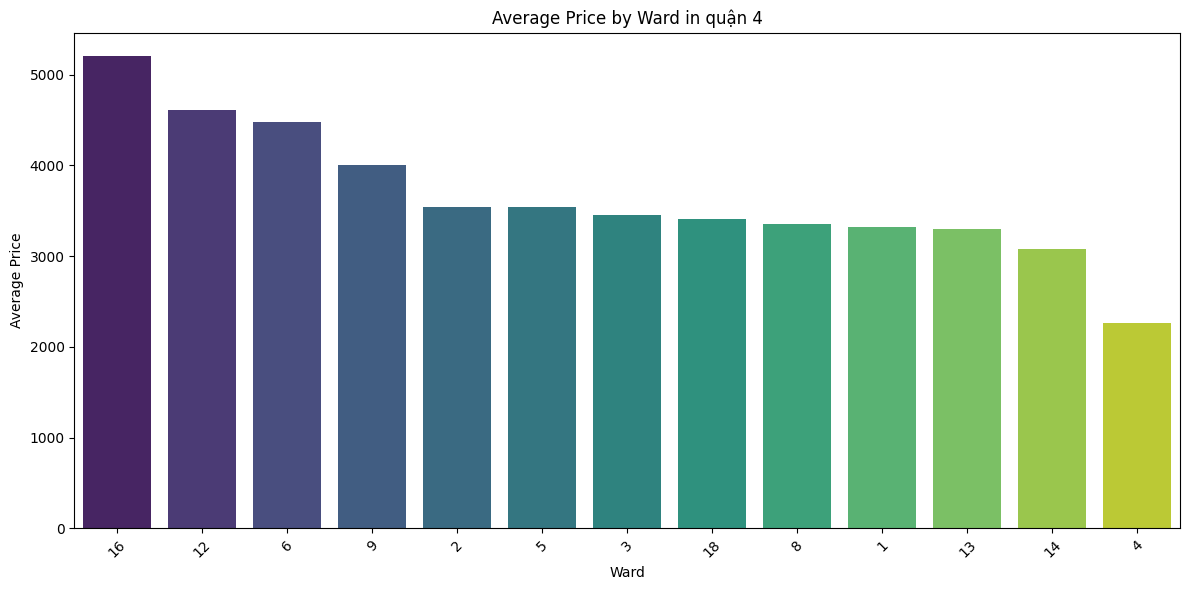

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


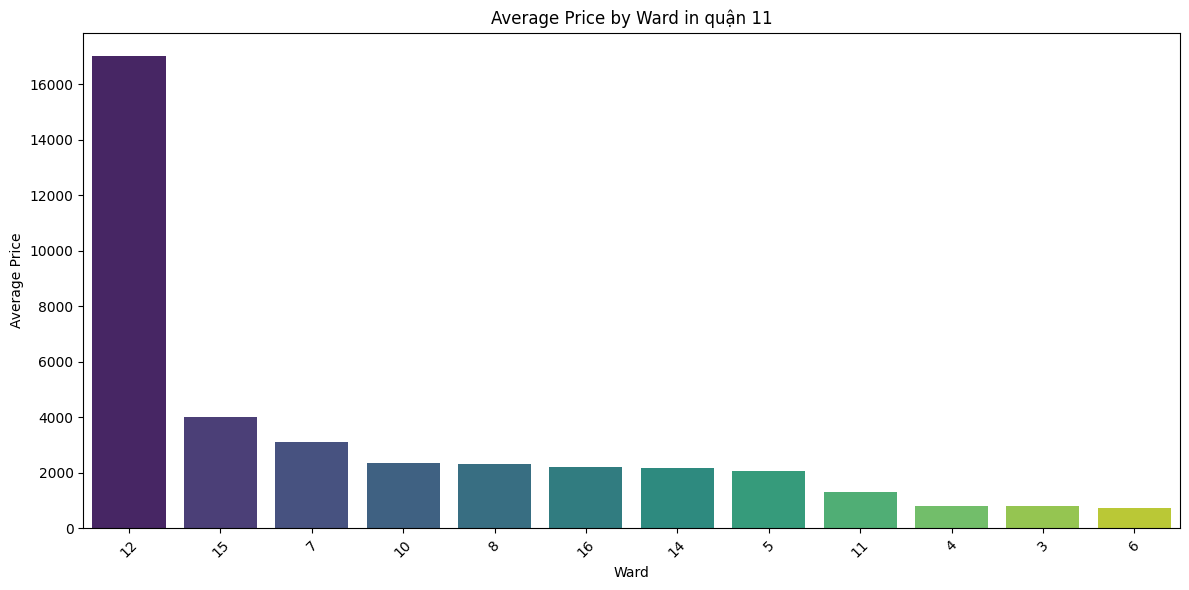

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


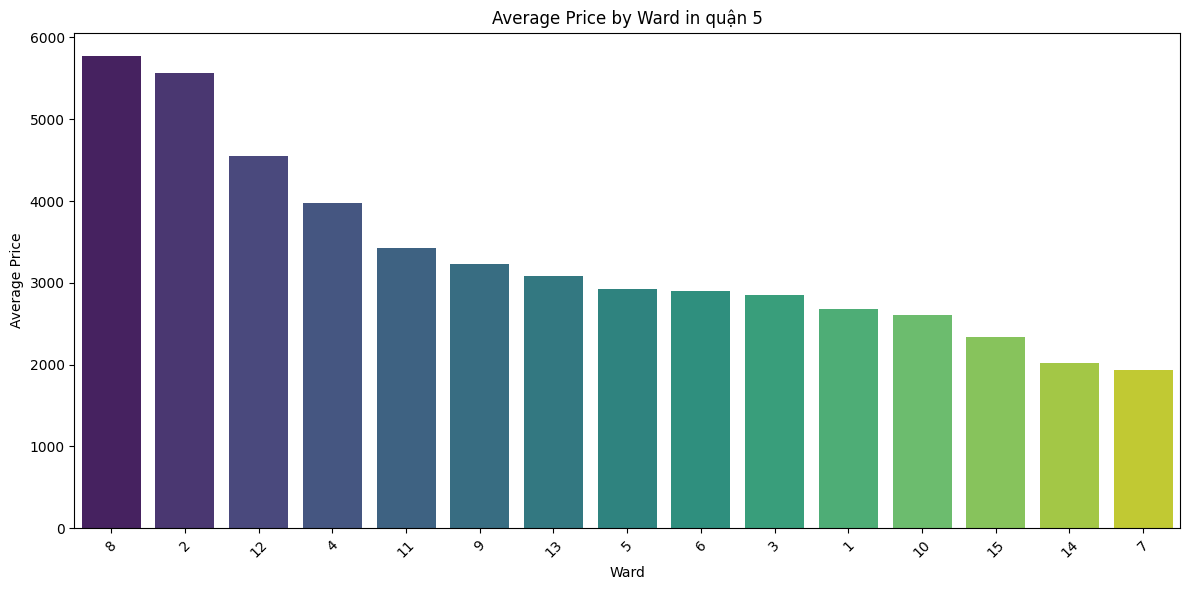

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


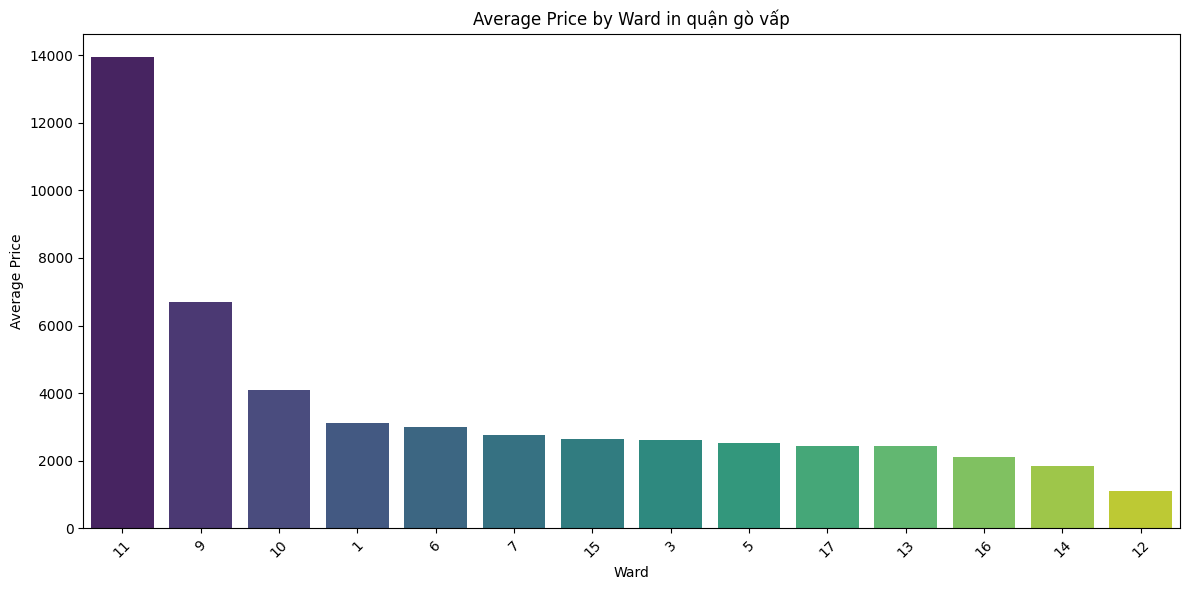

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


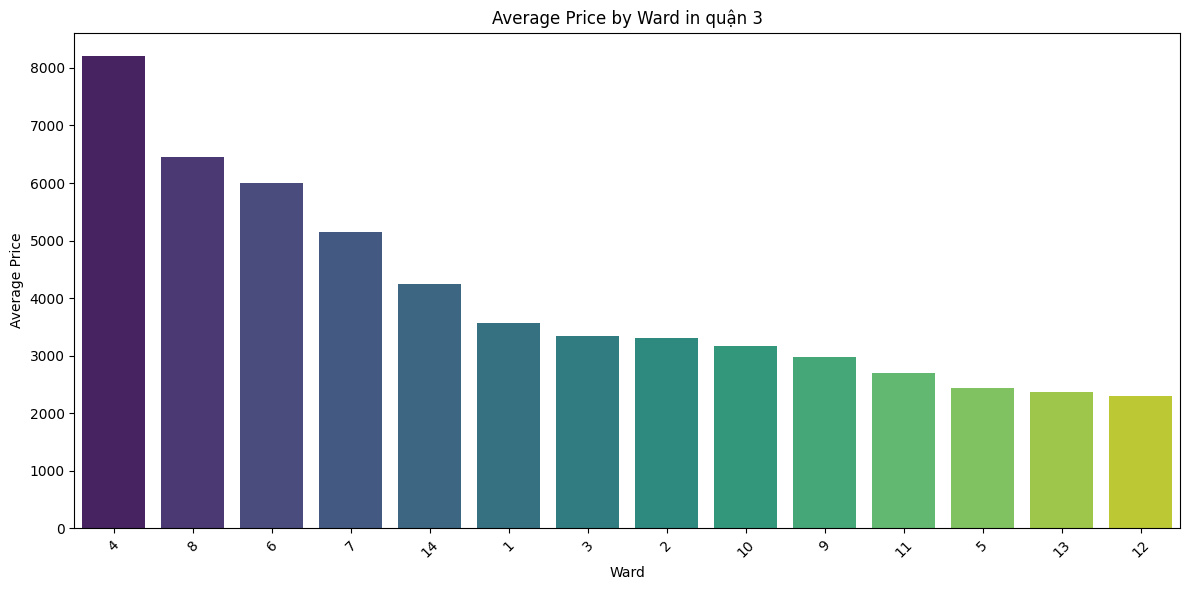

<ipython-input-72-6cc12ec4e7e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')


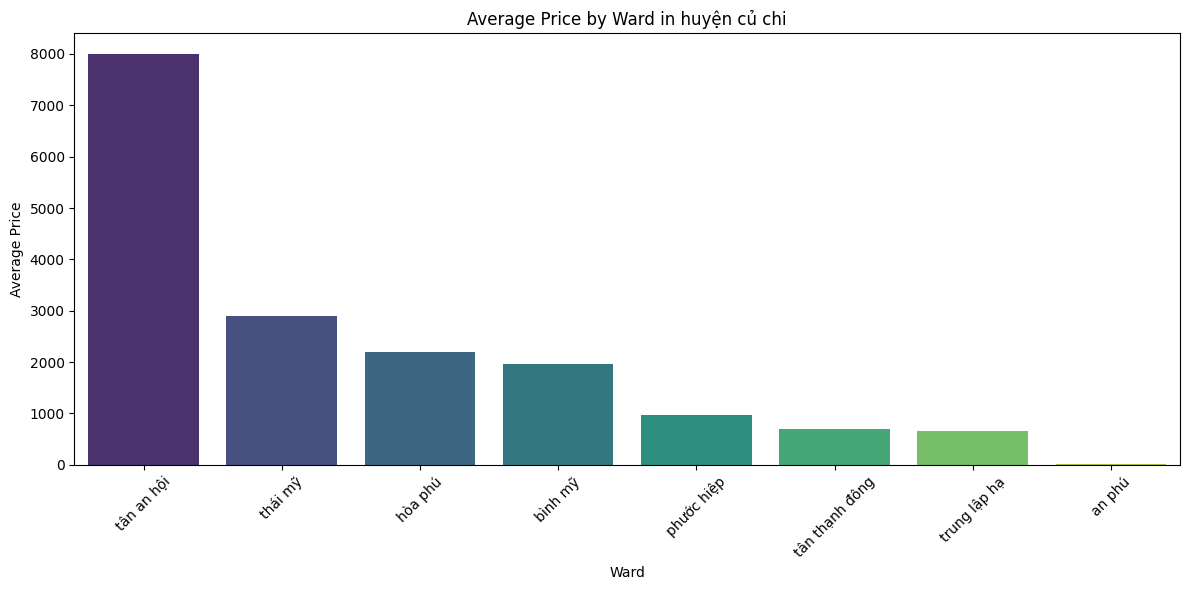

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_by_district_and_ward(df):
    """
    Plots the average price by district and ward separately for each district.

    Args:
        df: Pandas DataFrame containing 'Quan', 'Phuong_Xa', and 'Gia' columns.
    """
    # Lặp qua từng quận để vẽ biểu đồ riêng biệt
    for district in df['Quan'].unique():
        district_df = df[df['Quan'] == district]

        # Tính giá trung bình theo từng phường trong quận
        average_price = district_df.groupby('Phuong_Xa')['Gia'].mean().sort_values(ascending=False)

        # Vẽ biểu đồ
        plt.figure(figsize=(12, 6))
        sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')
        plt.title(f'Average Price by Ward in {district}')
        plt.xlabel('Ward')
        plt.ylabel('Average Price')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function with your DataFrame
plot_price_by_district_and_ward(df_cleaned)


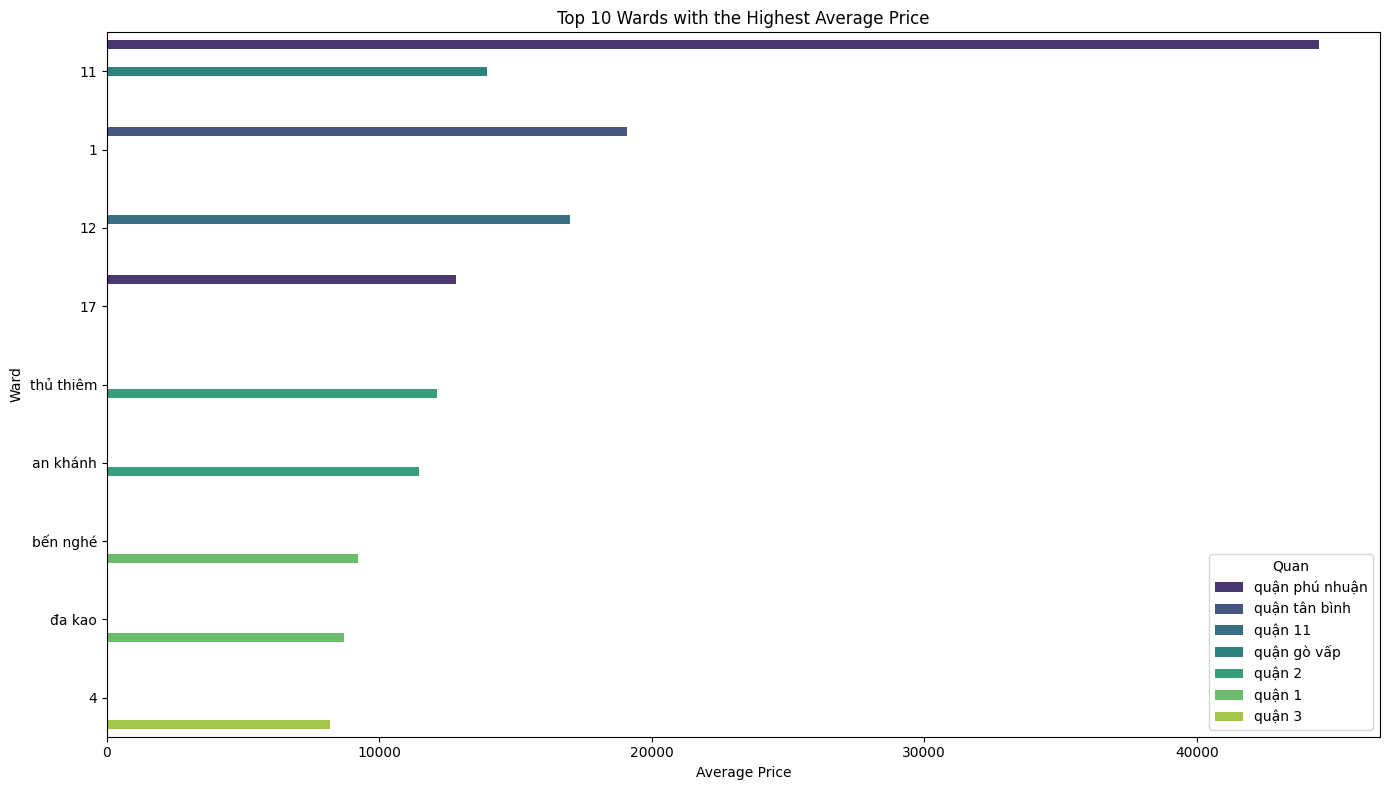

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_10_wards(df):
    """
    Plots the top 10 wards with the highest average price across all districts.

    Args:
        df: Pandas DataFrame containing 'Quan', 'Phuong_Xa', and 'Gia' columns.
    """
    # Tính giá trung bình theo từng phường và quận
    average_price = df.groupby(['Quan', 'Phuong_Xa'])['Gia'].mean().reset_index()

    # Sắp xếp theo giá trung bình giảm dần và chọn ra top 10 phường
    top_10_wards = average_price.sort_values(by='Gia', ascending=False).head(10)

    # Vẽ biểu đồ
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Gia', y='Phuong_Xa', hue='Quan', data=top_10_wards, palette='viridis')
    plt.title('Top 10 Wards with the Highest Average Price')
    plt.xlabel('Average Price')
    plt.ylabel('Ward')
    plt.tight_layout()  # Điều chỉnh layout để hiển thị đẹp hơn
    plt.show()

# Gọi hàm với DataFrame của bạn
plot_top_10_wards(df_cleaned)


<ipython-input-74-77bd5b100cdc>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(['range', 'TinhTrangNoiThat'])['Gia'].mean().reset_index()


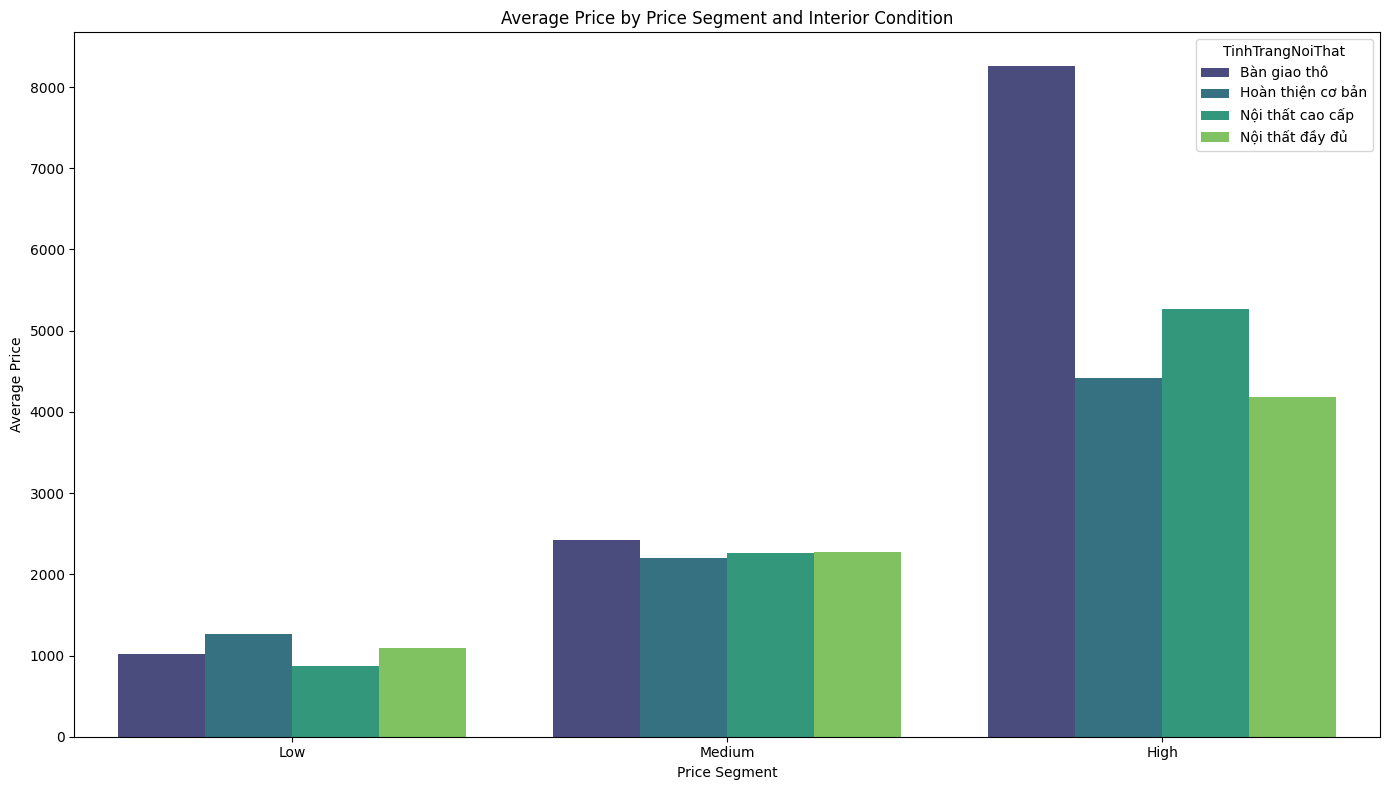

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_segments_vs_interior_condition(df):
    """
    Plots the average price for each price segment and interior condition.

    Args:
        df: Pandas DataFrame containing 'range', 'Gia', and 'TinhTrangNoiThat' columns.
    """
    # Tính giá trung bình theo phân khúc giá và tình trạng nội thất
    avg_price = df.groupby(['range', 'TinhTrangNoiThat'])['Gia'].mean().reset_index()

    # Vẽ biểu đồ hình cột
    plt.figure(figsize=(14, 8))
    sns.barplot(x='range', y='Gia', hue='TinhTrangNoiThat', data=avg_price, palette='viridis')
    plt.title('Average Price by Price Segment and Interior Condition')
    plt.xlabel('Price Segment')
    plt.ylabel('Average Price')
    plt.tight_layout()  # Điều chỉnh bố cục để hiển thị đẹp hơn
    plt.show()

# Gọi hàm với DataFrame của bạn
plot_price_segments_vs_interior_condition(df_cleaned)


<ipython-input-75-5c403db6c792>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(['range', 'TinhTrangBDS'])['Gia'].mean().reset_index()


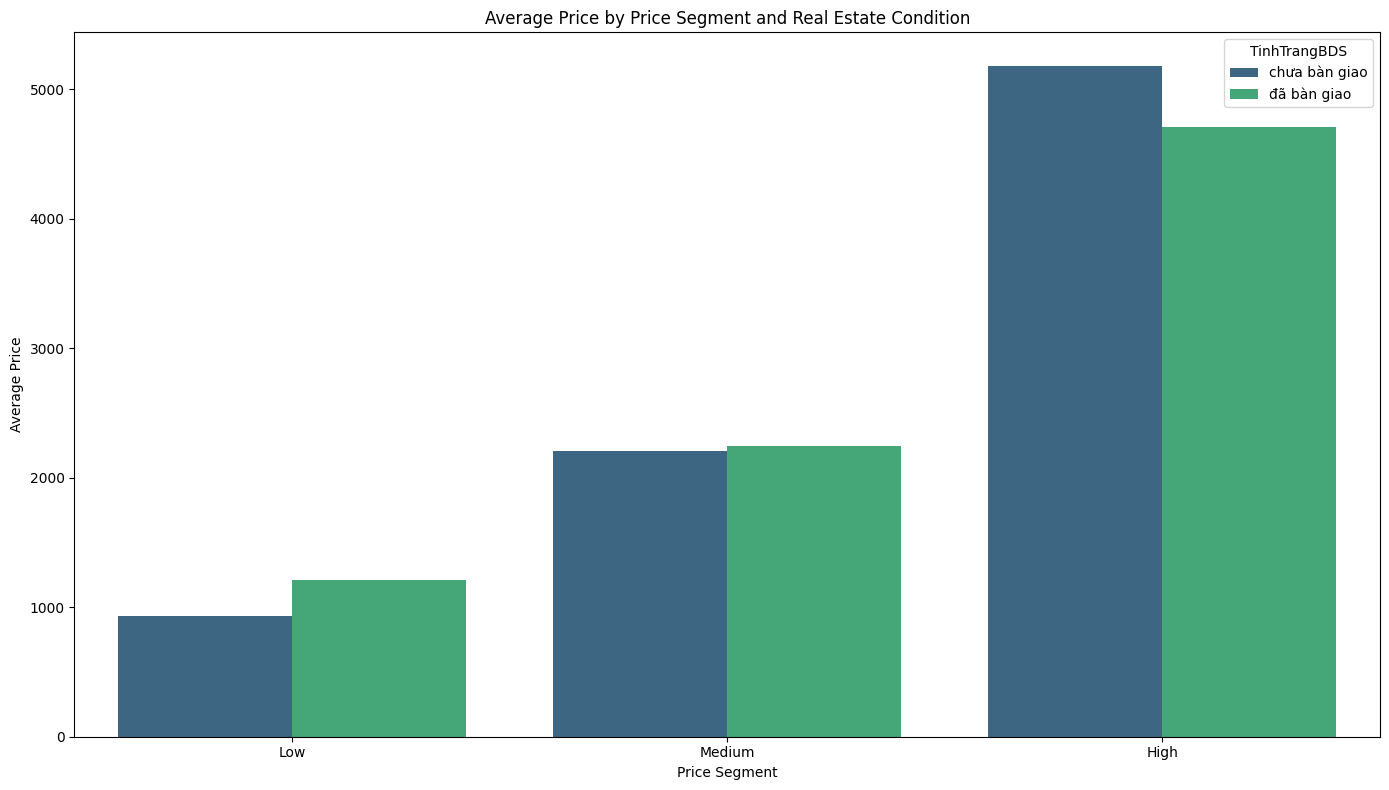

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_segments_vs_real_estate_condition(df):
    """
    Plots the average price for each price segment and real estate condition.

    Args:
        df: Pandas DataFrame containing 'range', 'Gia', and 'TinhTrangBDS' columns.
    """
    # Tính giá trung bình theo phân khúc giá và tình trạng bất động sản
    avg_price = df.groupby(['range', 'TinhTrangBDS'])['Gia'].mean().reset_index()

    # Vẽ biểu đồ hình cột
    plt.figure(figsize=(14, 8))
    sns.barplot(x='range', y='Gia', hue='TinhTrangBDS', data=avg_price, palette='viridis')
    plt.title('Average Price by Price Segment and Real Estate Condition')
    plt.xlabel('Price Segment')
    plt.ylabel('Average Price')
    plt.tight_layout()  # Điều chỉnh bố cục để hiển thị đẹp hơn
    plt.show()

# Gọi hàm với DataFrame của bạn
plot_price_segments_vs_real_estate_condition(df_cleaned)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 0 to 17534
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Quan              17532 non-null  object  
 1   TinhTrangBDS      17532 non-null  object  
 2   DienTich          17532 non-null  float64 
 3   Phongngu          17532 non-null  float64 
 4   PhongTam          17532 non-null  float64 
 5   Loai              17532 non-null  object  
 6   GiayTo            17532 non-null  object  
 7   TinhTrangNoiThat  17532 non-null  object  
 8   Gia               17532 non-null  float64 
 9   log_price         17532 non-null  float64 
 10  Phuong_Xa         17532 non-null  object  
 11  Gia_m2            17532 non-null  float64 
 12  range             17532 non-null  category
dtypes: category(1), float64(6), object(6)
memory usage: 1.8+ MB


In [ ]:
# prompt: xóa giúp tôi cột log_price và Gia_m2

# Assuming df_cleaned is your DataFrame.

# Drop the columns 'log_price' and 'Gia_m2'
if 'log_price' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop('log_price', axis=1)
if 'Gia_m2' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop('Gia_m2', axis=1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 0 to 17534
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Quan              17532 non-null  object  
 1   TinhTrangBDS      17532 non-null  object  
 2   DienTich          17532 non-null  float64 
 3   Phongngu          17532 non-null  float64 
 4   PhongTam          17532 non-null  float64 
 5   Loai              17532 non-null  object  
 6   GiayTo            17532 non-null  object  
 7   TinhTrangNoiThat  17532 non-null  object  
 8   Gia               17532 non-null  float64 
 9   Phuong_Xa         17532 non-null  object  
 10  range             17532 non-null  category
dtypes: category(1), float64(4), object(6)
memory usage: 1.5+ MB


In [ ]:
# Chuyển các cột kiểu object thành category
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Kiểm tra lại kiểu dữ liệu
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 0 to 17534
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Quan              17532 non-null  category
 1   TinhTrangBDS      17532 non-null  category
 2   DienTich          17532 non-null  float64 
 3   Phongngu          17532 non-null  float64 
 4   PhongTam          17532 non-null  float64 
 5   Loai              17532 non-null  category
 6   GiayTo            17532 non-null  category
 7   TinhTrangNoiThat  17532 non-null  category
 8   Gia               17532 non-null  float64 
 9   Phuong_Xa         17532 non-null  category
 10  range             17532 non-null  category
dtypes: category(7), float64(4)
memory usage: 828.6 KB


In [ ]:
from sklearn.model_selection import train_test_split
# Lấy danh sách các cột đầu vào, loại bỏ cột mục tiêu 'Gia'
feature_cols = [col for col in df_cleaned.columns if col != 'Gia']
x = df_cleaned[feature_cols]  # Các biến đầu vào
y = df_cleaned['Gia']         # Biến mục tiêu

# Tách dữ liệu thành tập train và test với tỷ lệ 80-20
x, X_test, y, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Kiểm tra kích thước của từng tập dữ liệu
print("Kích thước tập train:", X_train.shape, y_train.shape)
print("Kích thước tập test:", X_test.shape, y_test.shape)


Kích thước tập train: (11649, 10) (11649,)
Kích thước tập test: (3507, 10) (3507,)


#**5. Xây dựng mô hình**

##Neural Network

In [ ]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
X_train, X_val, y_train,y_val = train_test_split(x,y, test_size = 0.2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

# Xác định các cột dạng category và cột số
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Sử dụng OneHotEncoder với handle_unknown='ignore' cho cột category
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ]
)

# Áp dụng chuyển đổi lên dữ liệu
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Tạo mô hình mạng neuron
model = Sequential([
    Dense(256, input_dim=X_train_transformed.shape[1], activation='linear'),  # Tăng số lượng nơron
    BatchNormalization(),  # Thêm Batch Normalization
    LeakyReLU(alpha=0.1),  # Sử dụng LeakyReLU thay vì ReLU
    Dropout(0.4),  # Tăng tỷ lệ Dropout để giảm overfitting
    Dense(128, activation='linear'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),
    Dense(64, activation='linear'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(1, activation='linear')  # Lớp đầu ra (hồi quy)
])

# Biên dịch mô hình với learning rate scheduler
optimizer = Adam(learning_rate=0.001)  # Thử learning rate khác
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình với thêm Callbacks để theo dõi và điều chỉnh learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train_transformed, y_train,
    validation_data=(X_val_transformed, y_val),
    epochs=200,  # Tăng số lượng epochs
    batch_size=32,  # Giảm batch size để có sự thay đổi trong mỗi cập nhật
    verbose=1,
    callbacks=[callback]  # Thêm callback để giảm learning rate
)

# Đánh giá trên tập kiểm tra
test_loss, test_mae = model.evaluate(X_test_transformed, y_test)
print("Loss trên tập kiểm tra:", test_loss)
print("MAE trên tập kiểm tra:", test_mae)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_transformed)

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 83s 219ms/step - loss: 14410167.0000 - mae: 2713.2197 - val_loss: 13638431.0000 - val_mae: 2704.8411 - learning_rate: 0.0010
Epoch 2/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 15141532.0000 - mae: 2723.5574 - val_loss: 13271645.0000 - val_mae: 2670.7544 - learning_rate: 0.0010
Epoch 3/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 13636477.0000 - mae: 2645.5544 - val_loss: 12796398.0000 - val_mae: 2622.4829 - learning_rate: 0.0010
Epoch 4/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 13775442.0000 - mae: 2619.0669 - val_loss: 12070011.0000 - val_mae: 2548.0752 - learning_rate: 0.0010
Epoch 5/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 13548426.0000 - mae: 2531.9158 - val_loss: 11647372.0000 - val_mae: 2485.6443 - learning_rate: 0.0010
Epoch 6/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 11374293.0000 - mae: 2410.7310 - val_loss: 10515880.0000 - val_mae: 2367.3579 - learning_rate: 0.0010
Epoch 7/200
35

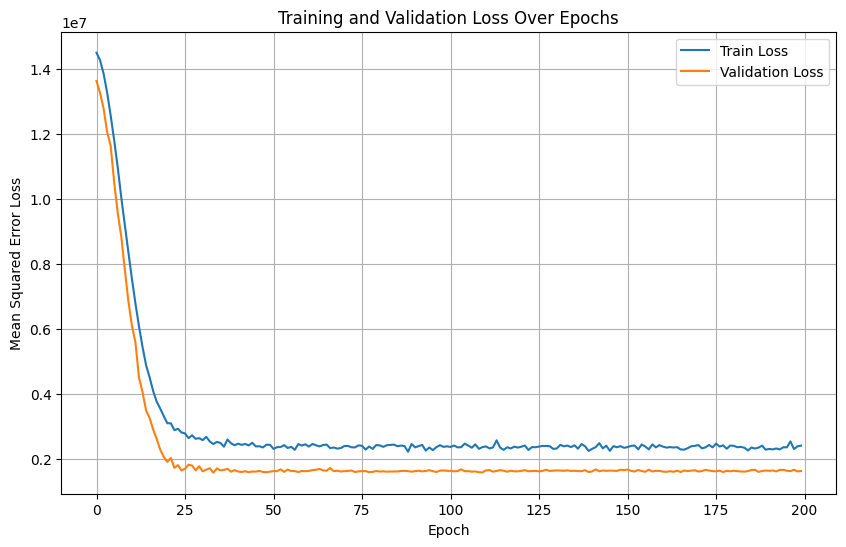

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')  # Đặt nhãn phù hợp
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


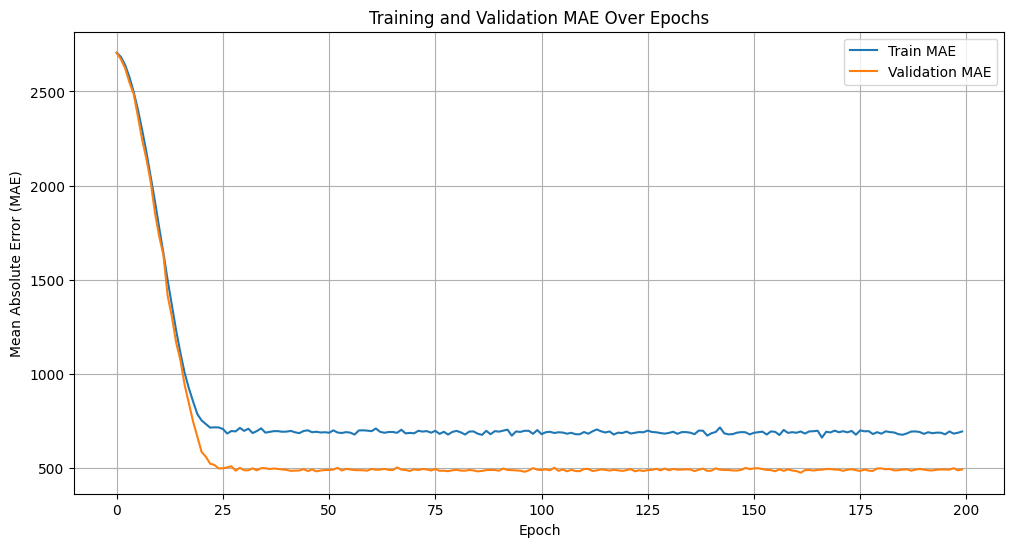

In [ ]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.title('Training and Validation MAE Over Epochs')
plt.show()


In [ ]:
df_cleaned['Gia'].mean()

2709.070936883642

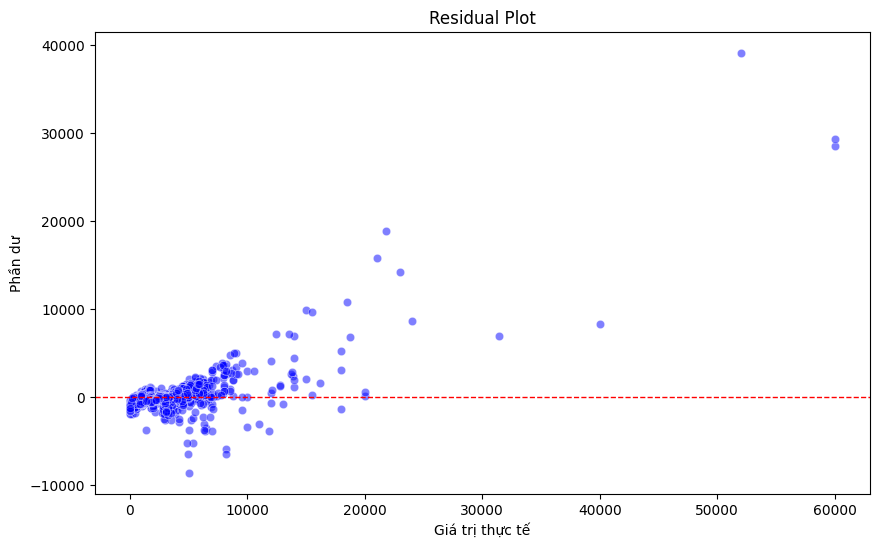

In [ ]:
# Đảm bảo y_pred là một mảng một chiều
y_pred = y_pred.flatten()

# Tính phần dư
residuals = y_test - y_pred

# Vẽ Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Đường ngang tại y=0
plt.xlabel('Giá trị thực tế')
plt.ylabel('Phần dư')
plt.title('Residual Plot')
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          47,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,549 (1.02 MB)

 Trainable params: 89,217 (348.50 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 178,436 (697.02 KB)

##Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Định nghĩa số lượng bậc tối đa
max_degree = 3
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lưu kết quả RMSE trung bình cho từng bậc
average_rmse_per_degree = []

# Lặp qua các bậc từ 1 đến max_degree
for degree in range(1, max_degree + 1):
    # Tạo pipeline gồm PolynomialFeatures và LinearRegression
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

    # Sử dụng cross_val_score với hàm loss là negative mean squared error
    scores = cross_val_score(
        model, X_train_transformed, y_train,
        scoring='neg_mean_squared_error', cv=kf
    )

    # Tính toán RMSE trung bình
    average_rmse = np.sqrt(-scores.mean())
    average_rmse_per_degree.append(average_rmse)
    print(f"Bậc {degree}: RMSE trung bình = {average_rmse}")

# Tìm bậc tốt nhất
best_degree = np.argmin(average_rmse_per_degree) + 1
print(f"Bậc tốt nhất: {best_degree}")

Bậc 1: RMSE trung bình = 1809.0113611295783
Bậc 2: RMSE trung bình = 2070.704631522389
Bậc 3: RMSE trung bình = 12485.663578270569
Bậc tốt nhất: 1


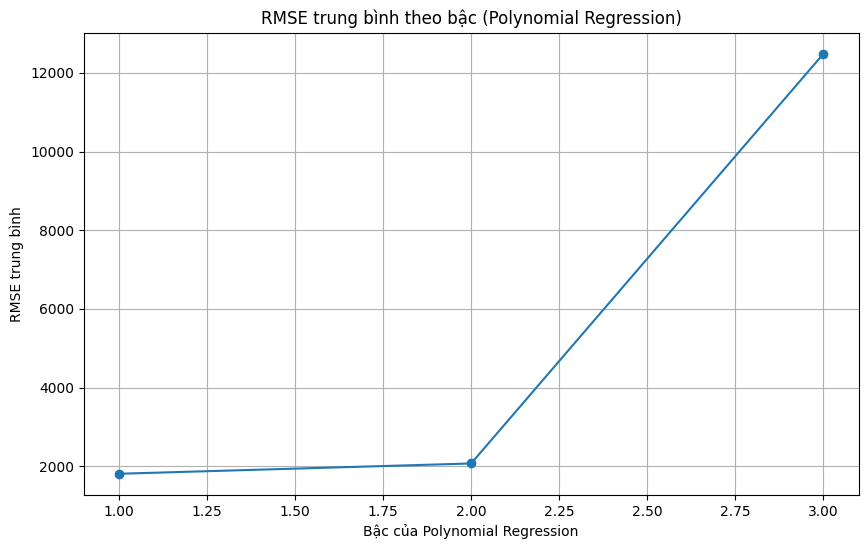

In [ ]:
# Vẽ biểu đồ RMSE theo bậc
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), average_rmse_per_degree, marker='o')
plt.title('RMSE trung bình theo bậc (Polynomial Regression)')
plt.xlabel('Bậc của Polynomial Regression')
plt.ylabel('RMSE trung bình')
plt.grid()
plt.show()

In [ ]:
# Huấn luyện mô hình với bậc tốt nhất
best_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),
    ('linear_regression', LinearRegression())
])

best_model.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm tra
y_pred_best = best_model.predict(X_test_transformed)

# Tính toán RMSE trên tập kiểm tra
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"RMSE trên tập kiểm tra với bậc {best_degree}: {final_rmse}")

RMSE trên tập kiểm tra với bậc 1: 1840.7861333633748


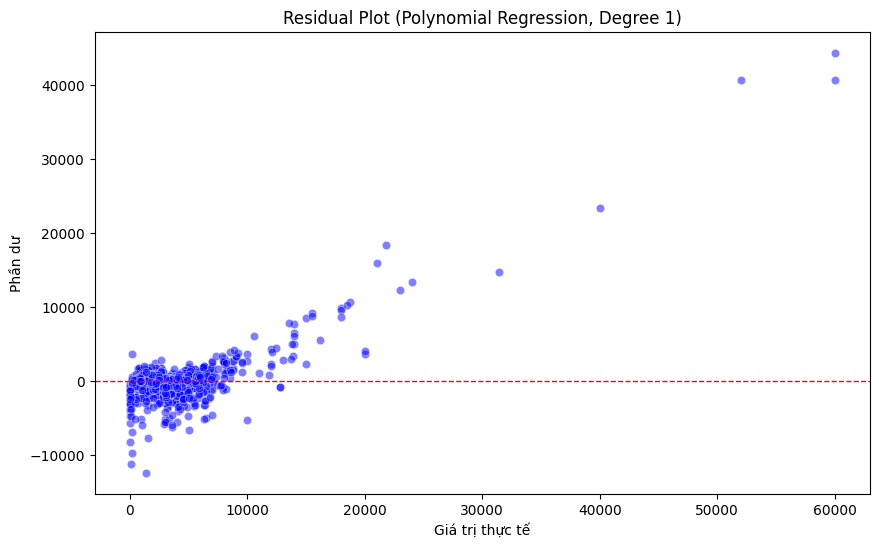

In [ ]:
# Vẽ Residual Plot cho bậc tốt nhất
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Phần dư')
plt.title(f'Residual Plot (Polynomial Regression, Degree {best_degree})')
plt.show()


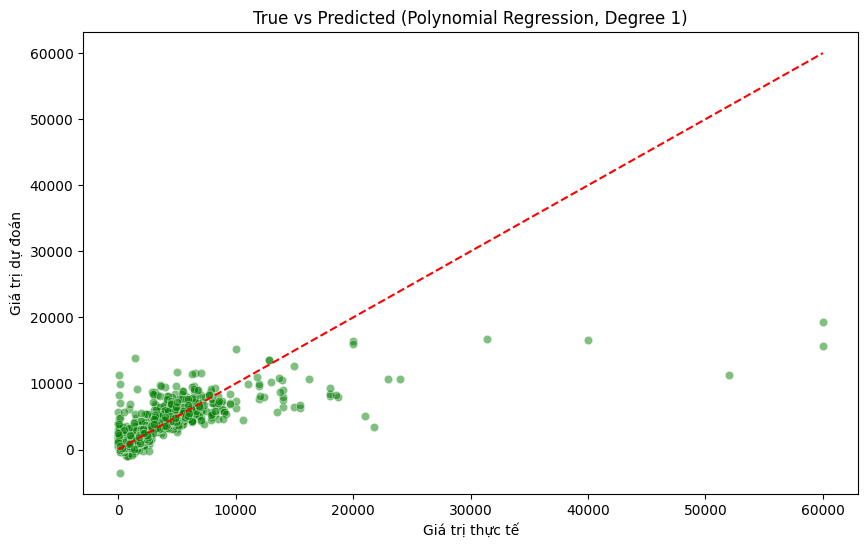

In [ ]:
# Vẽ True vs Predicted cho bậc tốt nhất
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title(f'True vs Predicted (Polynomial Regression, Degree {best_degree})')
plt.show()

##Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Định nghĩa các tham số cần tìm kiếm
n_estimators = [50, 100, 150, 200]  # Số lượng cây
learning_rates = [0.01, 0.05, 0.1, 0.2]  # Tỷ lệ học
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lưu kết quả RMSE và MAE trung bình cho từng bộ tham số
results = []

# Lặp qua tất cả các kết hợp của tham số
for lr in learning_rates:
    for n in n_estimators:
        # Khởi tạo mô hình Gradient Boosting Regressor với tham số hiện tại
        gbm = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, random_state=42)

        # Sử dụng cross_val_score với scoring='neg_mean_squared_error' để tính RMSE
        rmse_scores = cross_val_score(gbm, X_train_transformed, y_train,
                                      scoring='neg_mean_squared_error', cv=kf)
        avg_rmse = np.sqrt(-rmse_scores.mean())

        # Sử dụng cross_val_score với scoring='neg_mean_absolute_error' để tính MAE
        mae_scores = cross_val_score(gbm, X_train_transformed, y_train,
                                     scoring='neg_mean_absolute_error', cv=kf)
        avg_mae = -mae_scores.mean()

        results.append((lr, n, avg_rmse, avg_mae))
        print(f"Learning rate: {lr}, N_estimators: {n}, Avg RMSE: {avg_rmse:.4f}, Avg MAE: {avg_mae:.4f}")

# Tìm tham số tốt nhất theo RMSE
best_params_rmse = min(results, key=lambda x: x[2])
best_lr_rmse, best_n_rmse, best_rmse, _ = best_params_rmse
print(f"\nTham số tốt nhất theo RMSE: Learning rate={best_lr_rmse}, N_estimators={best_n_rmse}, RMSE={best_rmse:.4f}")

# Tìm tham số tốt nhất theo MAE
best_params_mae = min(results, key=lambda x: x[3])
best_lr_mae, best_n_mae, _, best_mae = best_params_mae
print(f"Tham số tốt nhất theo MAE: Learning rate={best_lr_mae}, N_estimators={best_n_mae}, MAE={best_mae:.4f}")


Learning rate: 0.01, N_estimators: 50, Avg RMSE: 2175.7847, Avg MAE: 957.9980
Learning rate: 0.01, N_estimators: 100, Avg RMSE: 1949.4258, Avg MAE: 774.0260
Learning rate: 0.01, N_estimators: 150, Avg RMSE: 1843.4271, Avg MAE: 710.3370
Learning rate: 0.01, N_estimators: 200, Avg RMSE: 1780.4397, Avg MAE: 686.2843
Learning rate: 0.05, N_estimators: 50, Avg RMSE: 1751.3276, Avg MAE: 669.8951
Learning rate: 0.05, N_estimators: 100, Avg RMSE: 1665.7017, Avg MAE: 636.2827
Learning rate: 0.05, N_estimators: 150, Avg RMSE: 1637.6559, Avg MAE: 621.9660
Learning rate: 0.05, N_estimators: 200, Avg RMSE: 1631.4363, Avg MAE: 614.2275
Learning rate: 0.1, N_estimators: 50, Avg RMSE: 1674.4713, Avg MAE: 637.6722
Learning rate: 0.1, N_estimators: 100, Avg RMSE: 1636.9464, Avg MAE: 615.7777
Learning rate: 0.1, N_estimators: 150, Avg RMSE: 1633.4407, Avg MAE: 604.9899
Learning rate: 0.1, N_estimators: 200, Avg RMSE: 1627.8016, Avg MAE: 595.4698
Learning rate: 0.2, N_estimators: 50, Avg RMSE: 1606.2762, 

In [ ]:
# Huấn luyện mô hình tốt nhất theo RMSE
best_gbm_rmse = GradientBoostingRegressor(n_estimators=best_n_rmse, learning_rate=best_lr_rmse, random_state=42)
best_gbm_rmse.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm tra
y_pred_best_gbm_rmse = best_gbm_rmse.predict(X_test_transformed)

# Tính toán RMSE và MAE trên tập kiểm tra
final_rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_best_gbm_rmse))
final_mae_gbm = mean_absolute_error(y_test, y_pred_best_gbm_rmse)
print(f"\nTrên tập kiểm tra với Gradient Boosting Machine:")
print(f"RMSE: {final_rmse_gbm:.4f}")
print(f"MAE: {final_mae_gbm:.4f}")


Trên tập kiểm tra với Gradient Boosting Machine:
RMSE: 1486.2664
MAE: 535.8496


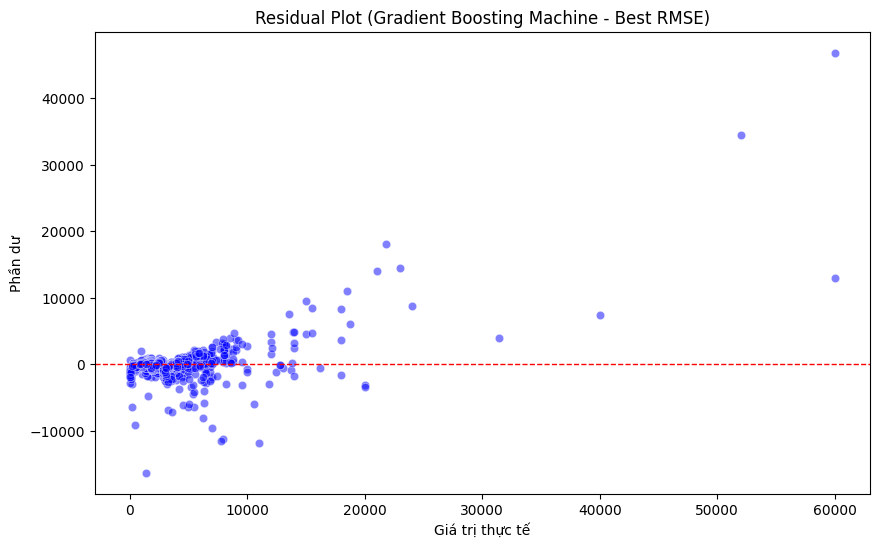

In [ ]:
# Vẽ Residual Plot cho mô hình tốt nhất theo RMSE
residuals_gbm = y_test - y_pred_best_gbm_rmse
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_gbm, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Phần dư')
plt.title('Residual Plot (Gradient Boosting Machine - Best RMSE)')
plt.show()


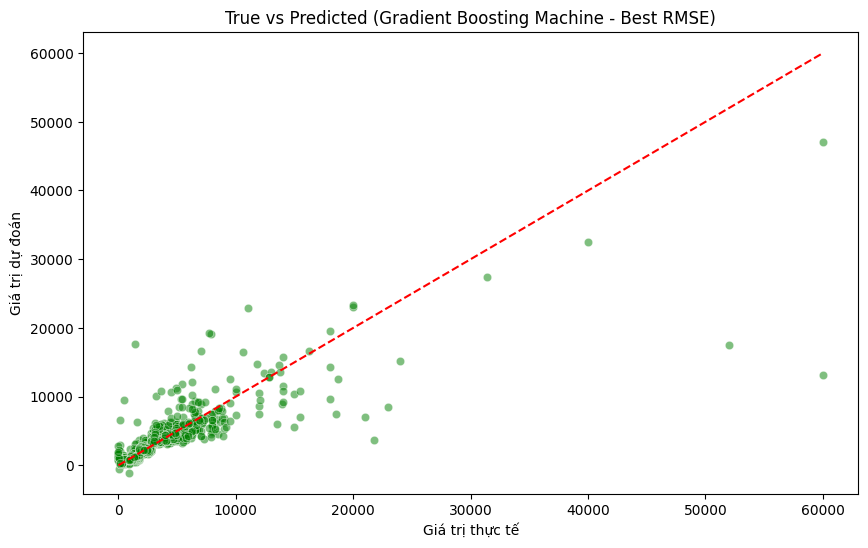

In [ ]:
# Vẽ True vs Predicted Plot cho mô hình tốt nhất theo RMSE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best_gbm_rmse, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('True vs Predicted (Gradient Boosting Machine - Best RMSE)')
plt.show()